# EDA of German Credit Data

### Importing the libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing the Dataset

In [33]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

column_names = [
    "Status", "Duration", "Credit_History", "Purpose", "Credit_Amount", "Savings", "Employment",
    "Installment_Rate", "Personal_Status", "Other_Debtors", "Residence_Since", "Property",
    "Age", "Other_Installment_Plans", "Housing", "Existing_Credits", "Job", "Liable_Persons",
    "Telephone", "Foreign_Worker", "Risk"
]

df = pd.read_csv(url, sep='\s+', names=column_names)
df['Risk'] = df['Risk'].map({1: 1, 2: 0})

df

,Status,Duration,Credit_History,Purpose,Credit_Amount,Savings,Employment,Installment_Rate,Personal_Status,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_Persons,Telephone,Foreign_Worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0


In [34]:
df.columns

Index(['Status', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
       'Savings', 'Employment', 'Installment_Rate', 'Personal_Status',
       'Other_Debtors', 'Residence_Since', 'Property', 'Age',
       'Other_Installment_Plans', 'Housing', 'Existing_Credits', 'Job',
       'Liable_Persons', 'Telephone', 'Foreign_Worker', 'Risk'],
      dtype='object')

In [54]:
graph_dir = "/mnt/d/Darsh/MSThesis/aqsvc/graphs/crm_analysis/"

### Performing Data Analysis

#### Relation between Numeric Columns

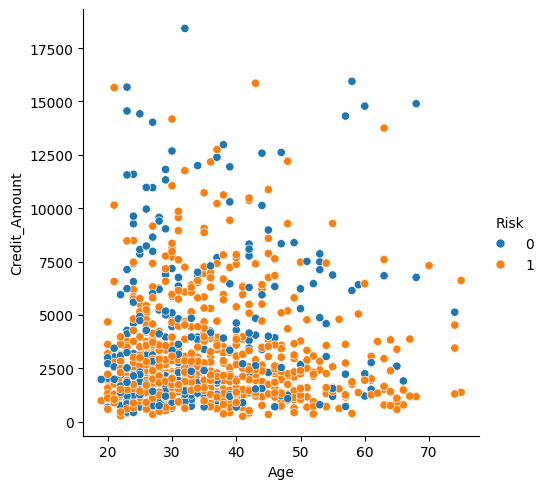

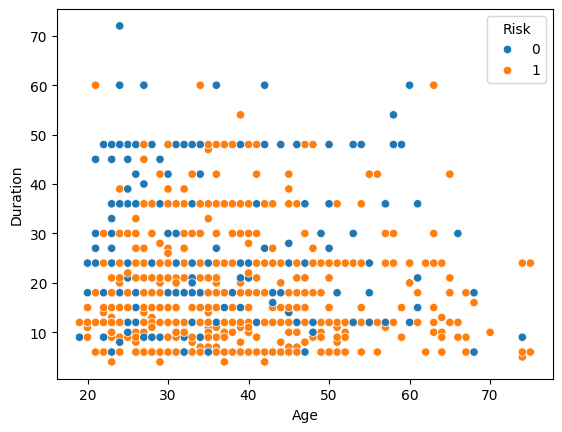

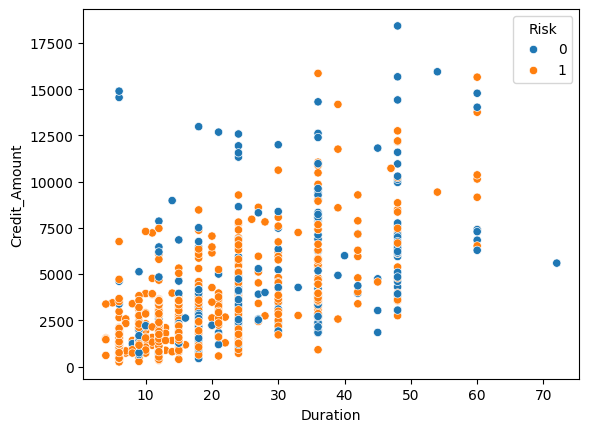

In [66]:
# Plot each relplot on a specific subplot
sns.relplot(data=df, x="Age", y="Credit_Amount", hue="Risk")
plt.savefig(graph_dir + "rel_age_cred.pdf")
plt.show()
sns.scatterplot(data=df, x="Age", y="Duration", hue="Risk")
plt.savefig(graph_dir + "rel_age_dur.pdf")
plt.show()
sns.scatterplot(data=df, x="Duration", y="Credit_Amount", hue="Risk")
plt.savefig(graph_dir + "rel_dur_cred.pdf")
plt.show()


#### Plotting the Distributions of Categorical Columns with Risk

In [68]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

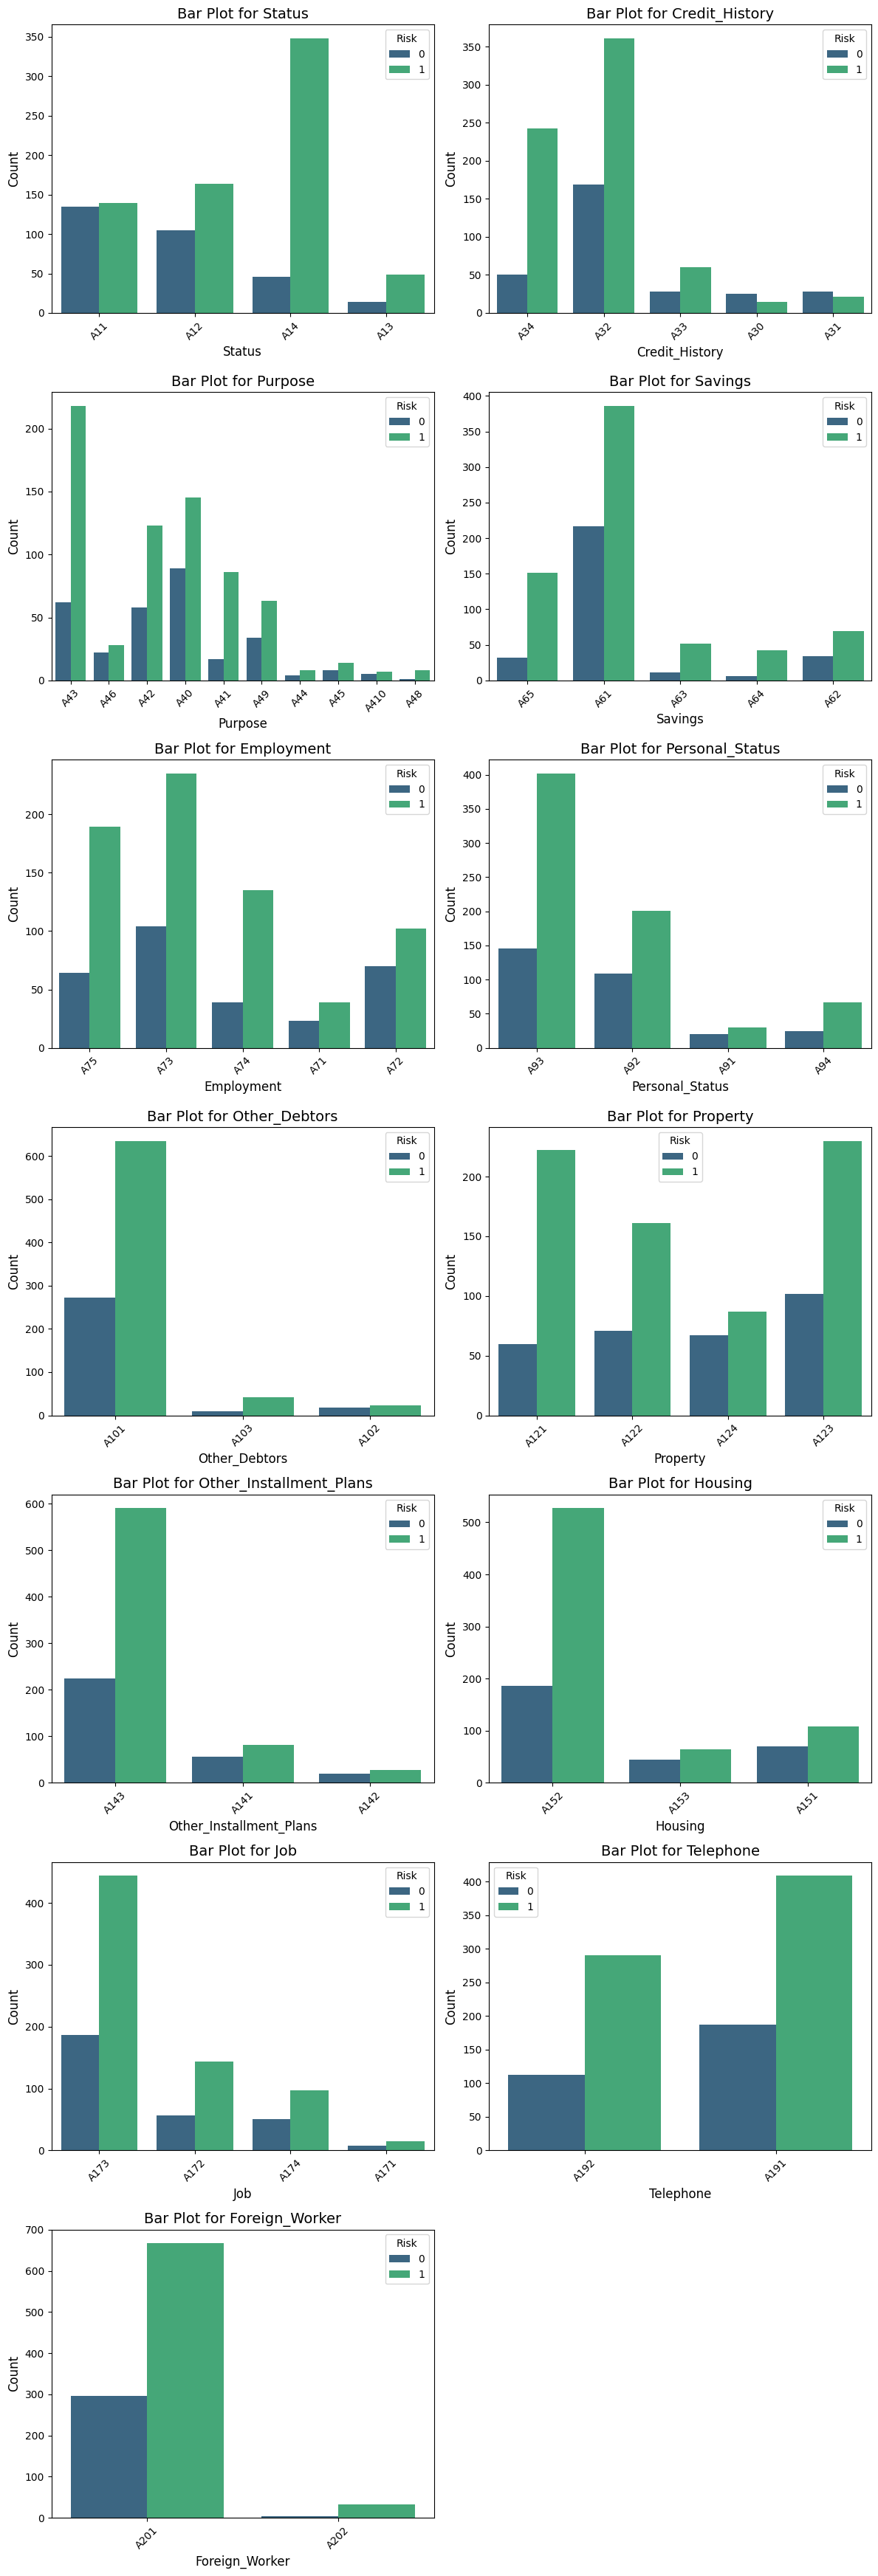

In [55]:
# Determine grid size for subplots
n_cols = 2  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes for easier indexing

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue="Risk", palette="viridis", ax=axes[i])  # Bar plot
    axes[i].set_title(f'Bar Plot for {col}', fontsize=14)  # Set title
    axes[i].set_xlabel(col, fontsize=12)  # Set x-axis label
    axes[i].set_ylabel('Count', fontsize=12)  # Set y-axis label
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Remove any empty subplots (if n_rows * n_cols > actual plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig(graph_dir + "cat.pdf")
plt.show()


#### Plotting the Hirtogram of Numerical Columns with Risk

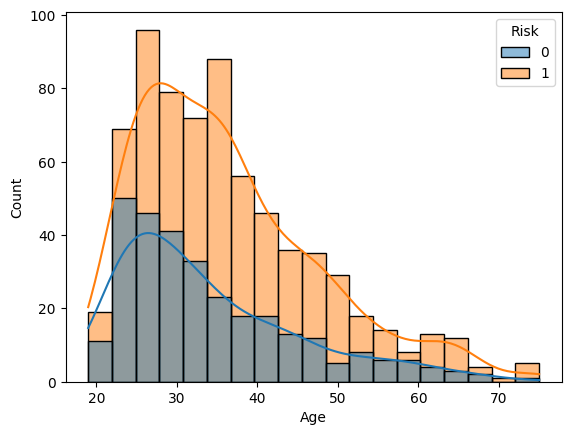

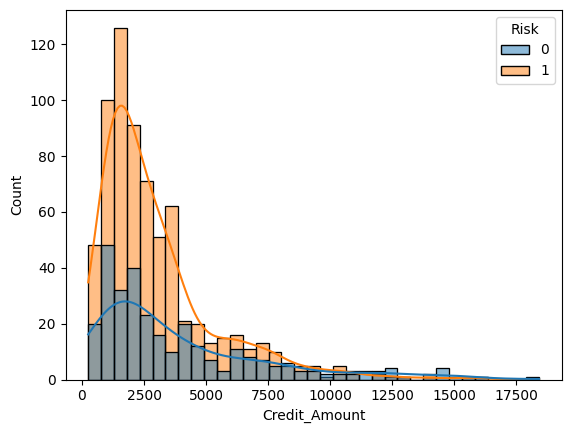

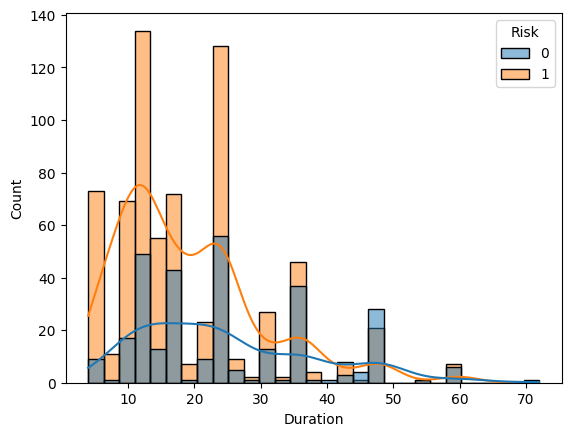

In [70]:
rows = ["Age", "Credit_Amount", "Duration"]
for row in rows:
    sns.histplot(data=df, x=row, kde=True, hue = "Risk", color="skyblue")
    plt.savefig(graph_dir + f"{row}_dist.pdf")
    plt.show()

#### Distribution of each numeric values with risk and all the categorical columns

/home/darsh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


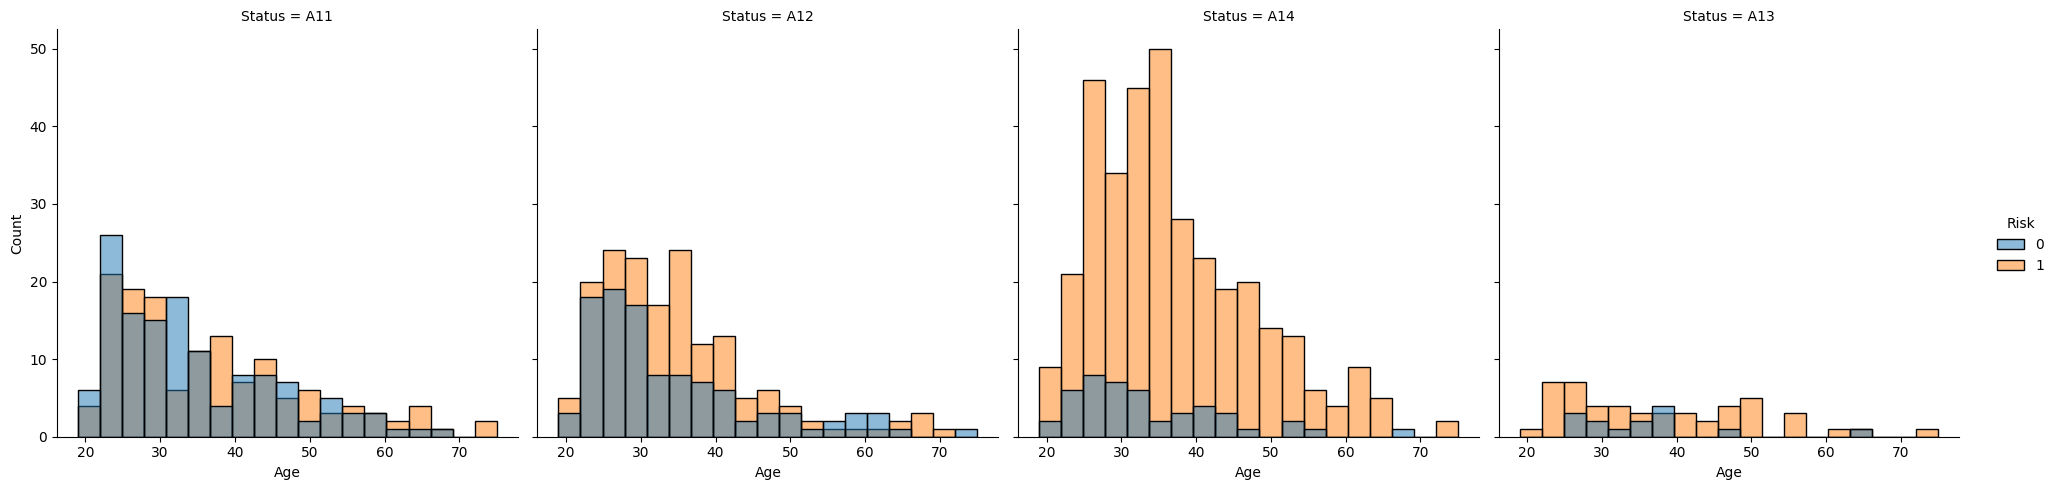

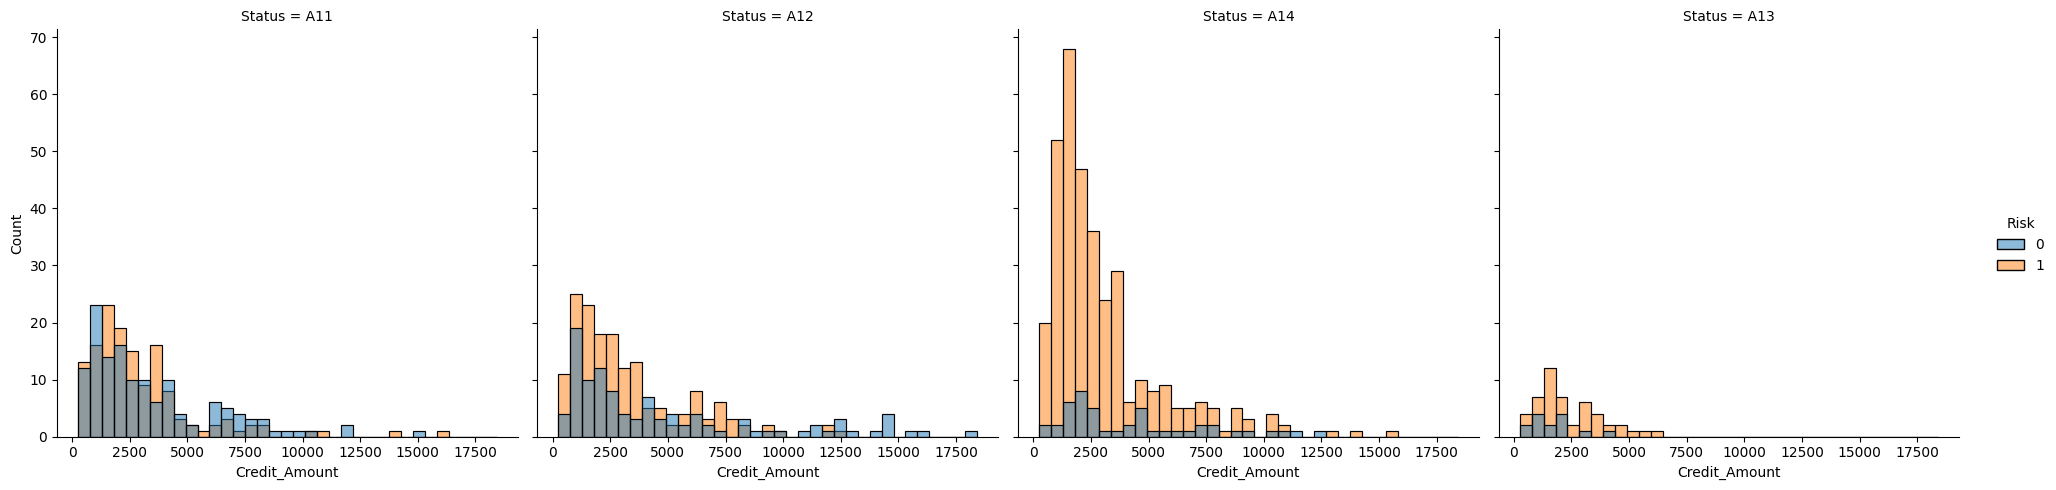

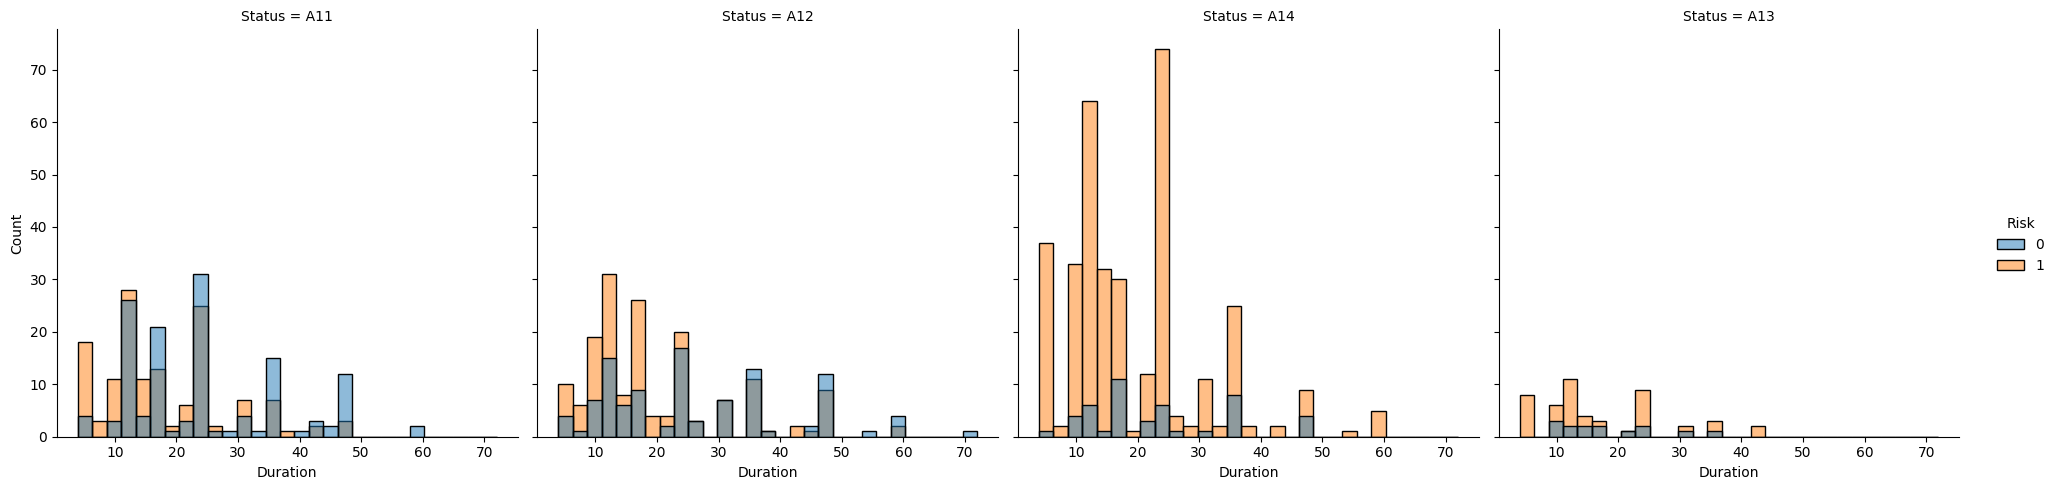

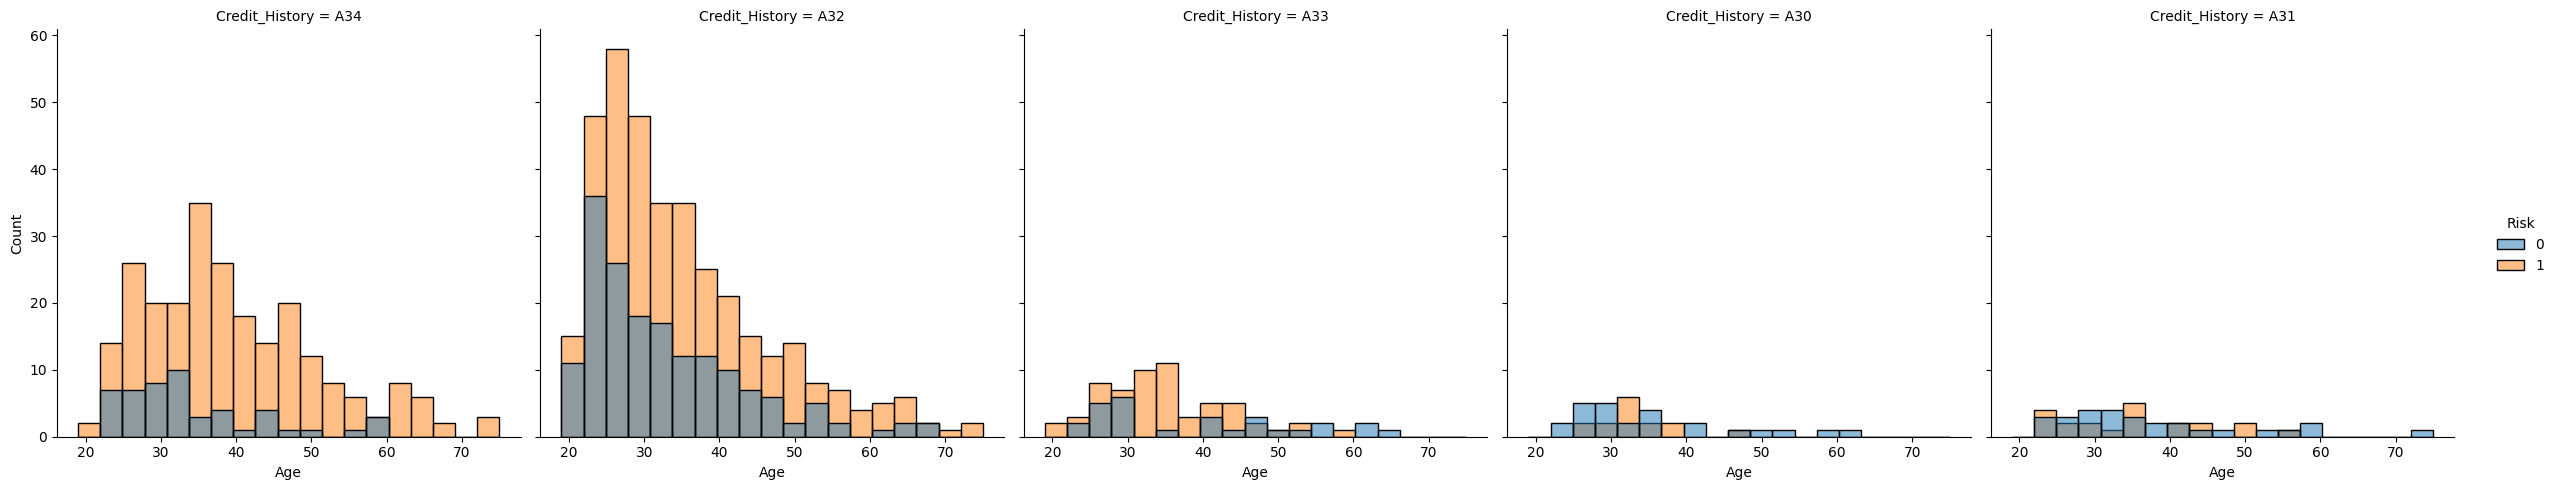

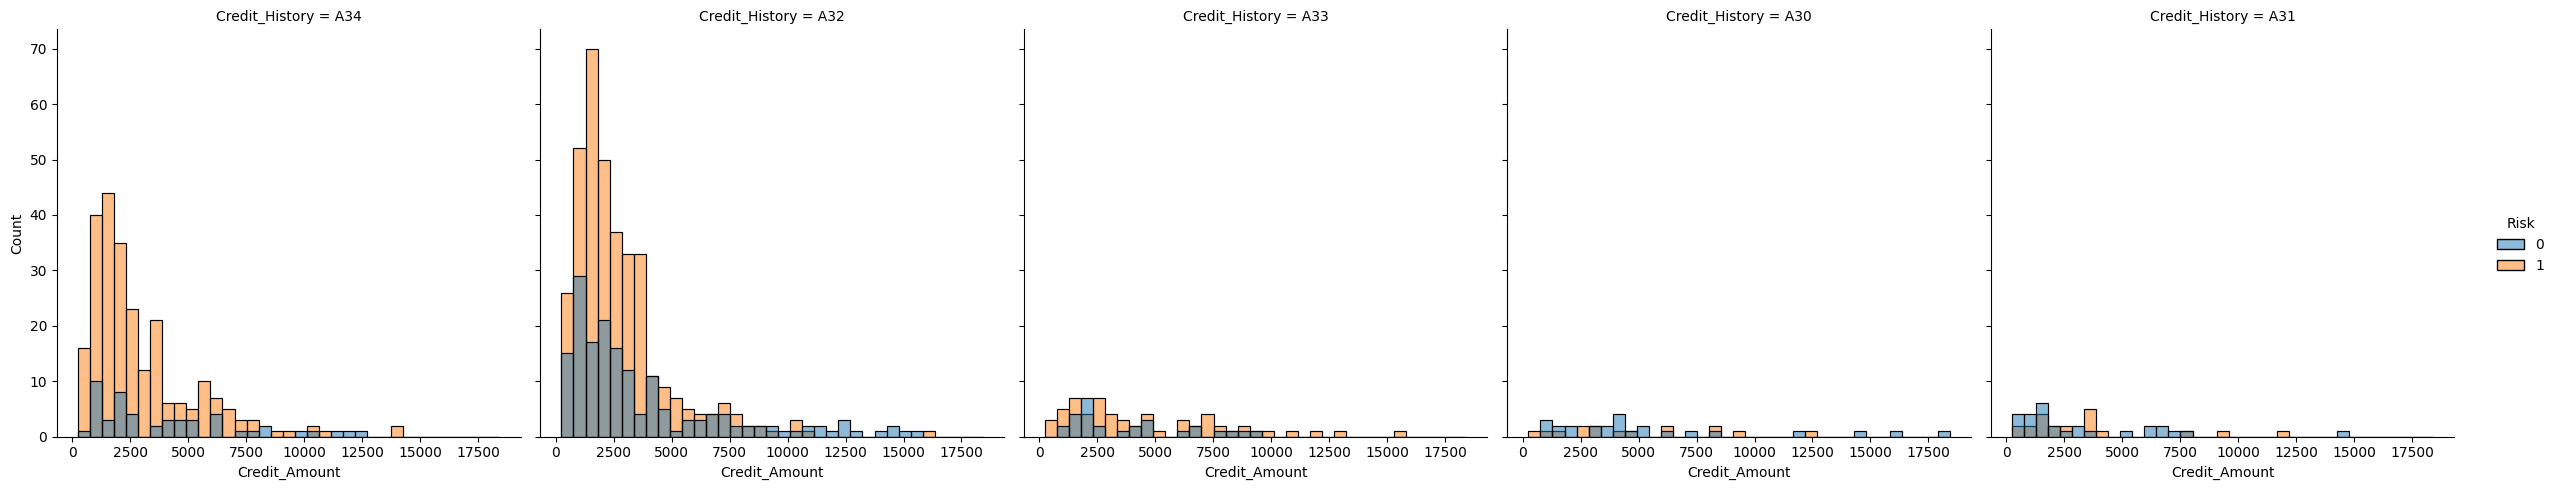

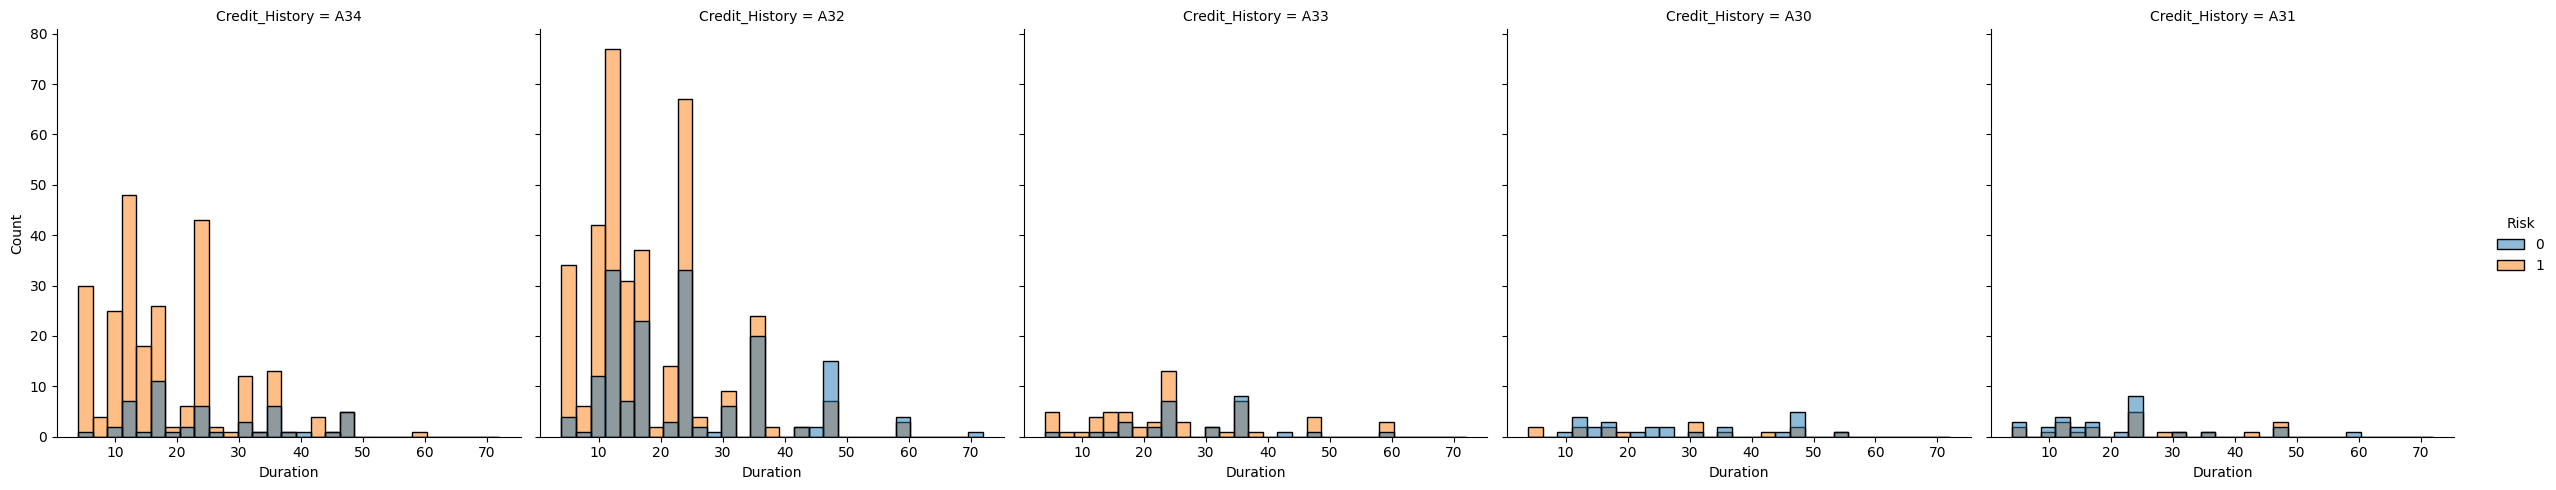

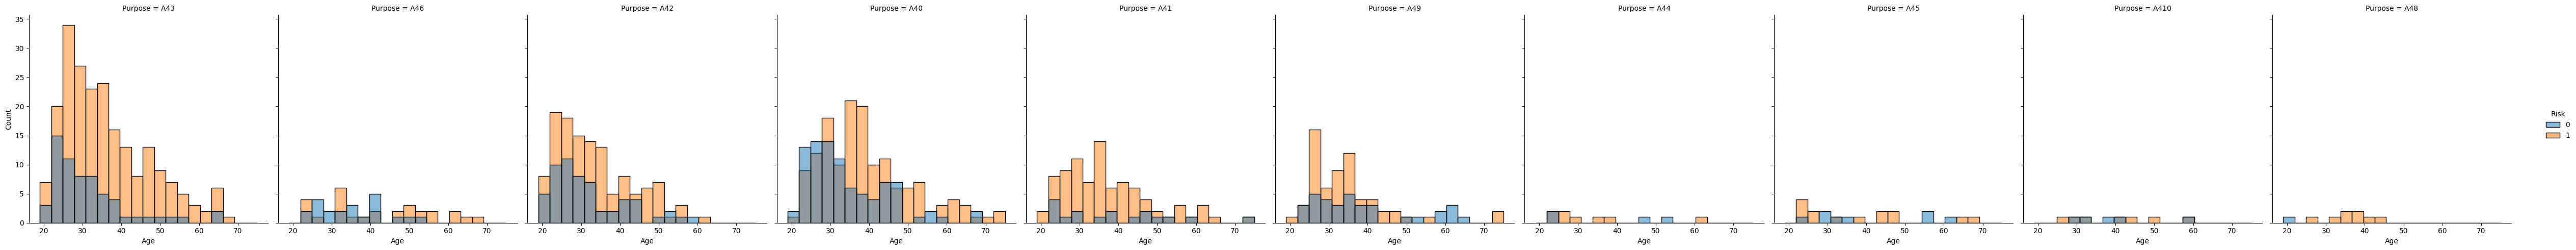

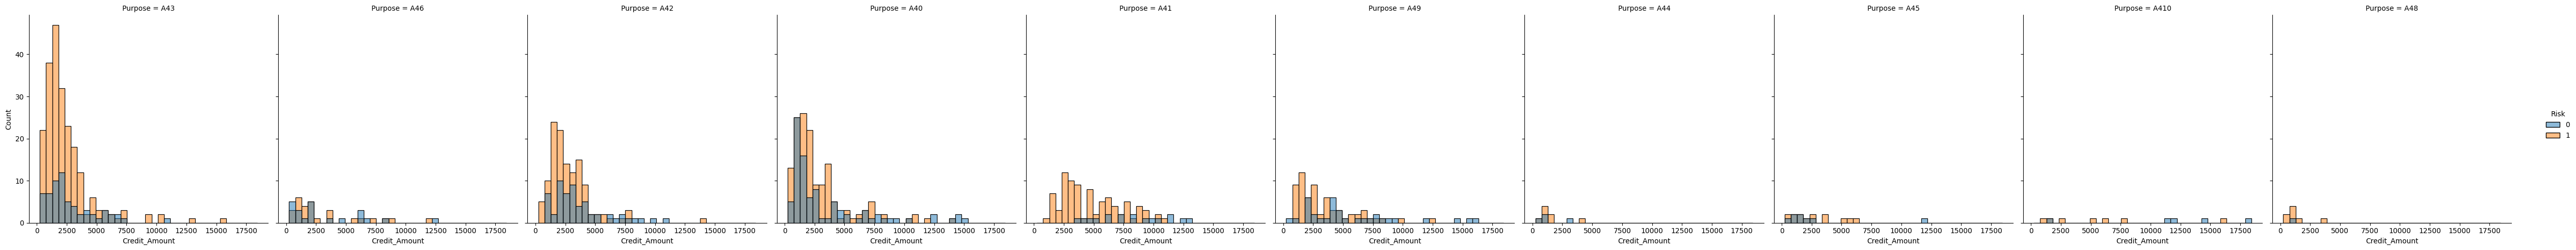

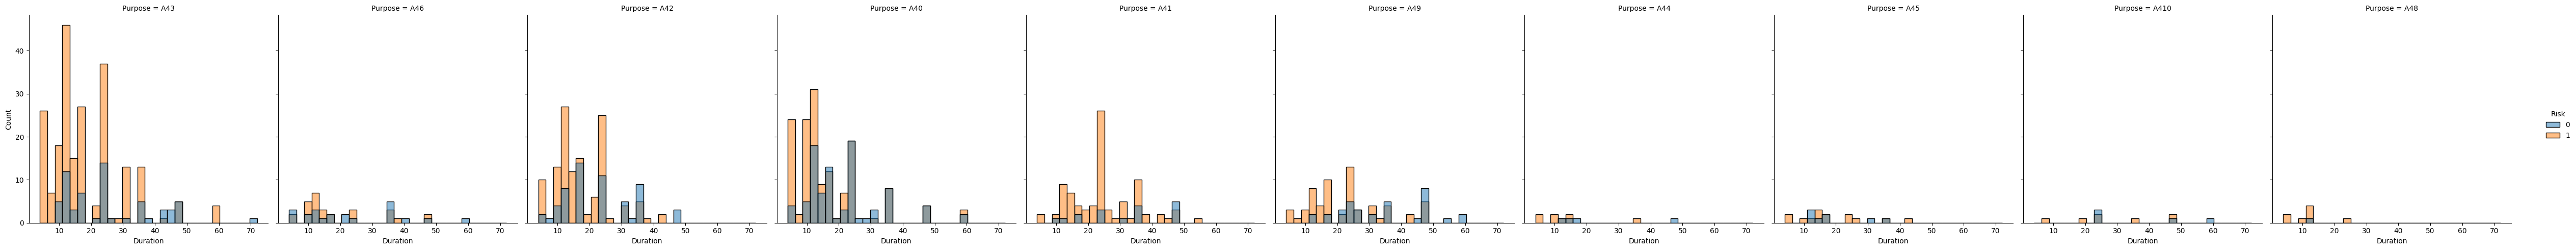

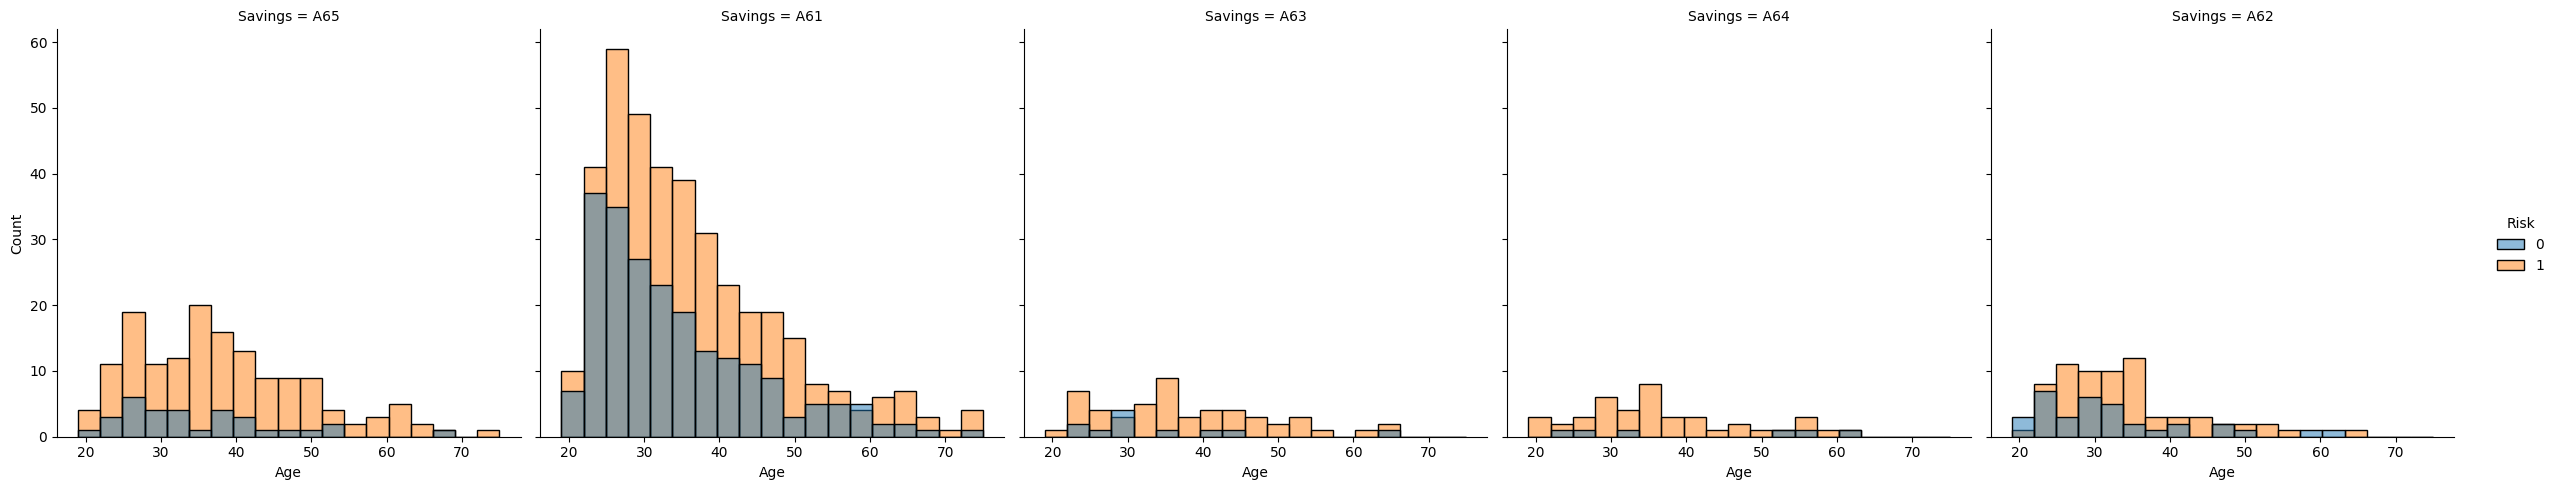

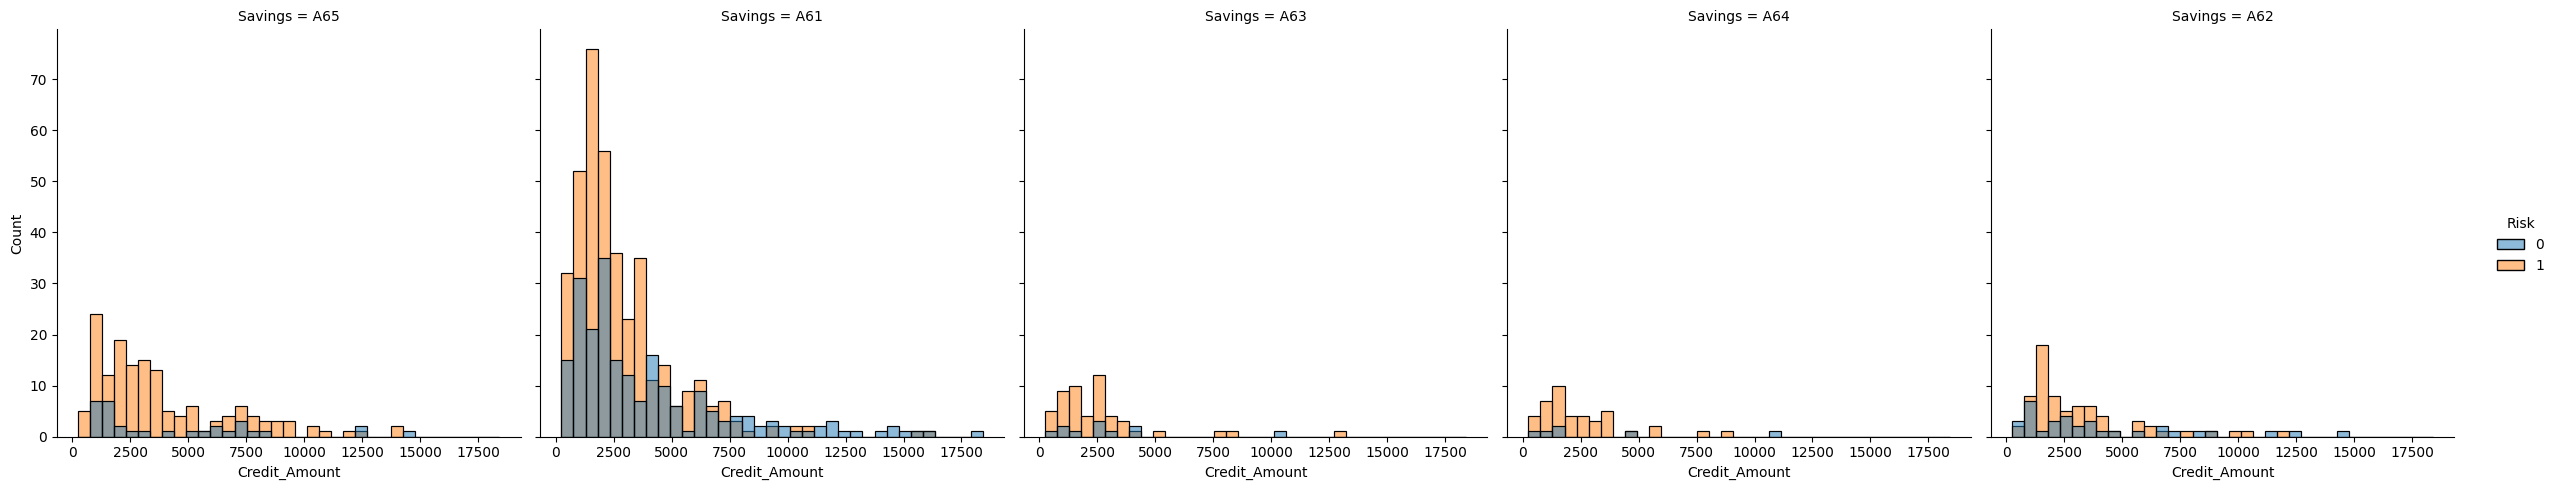

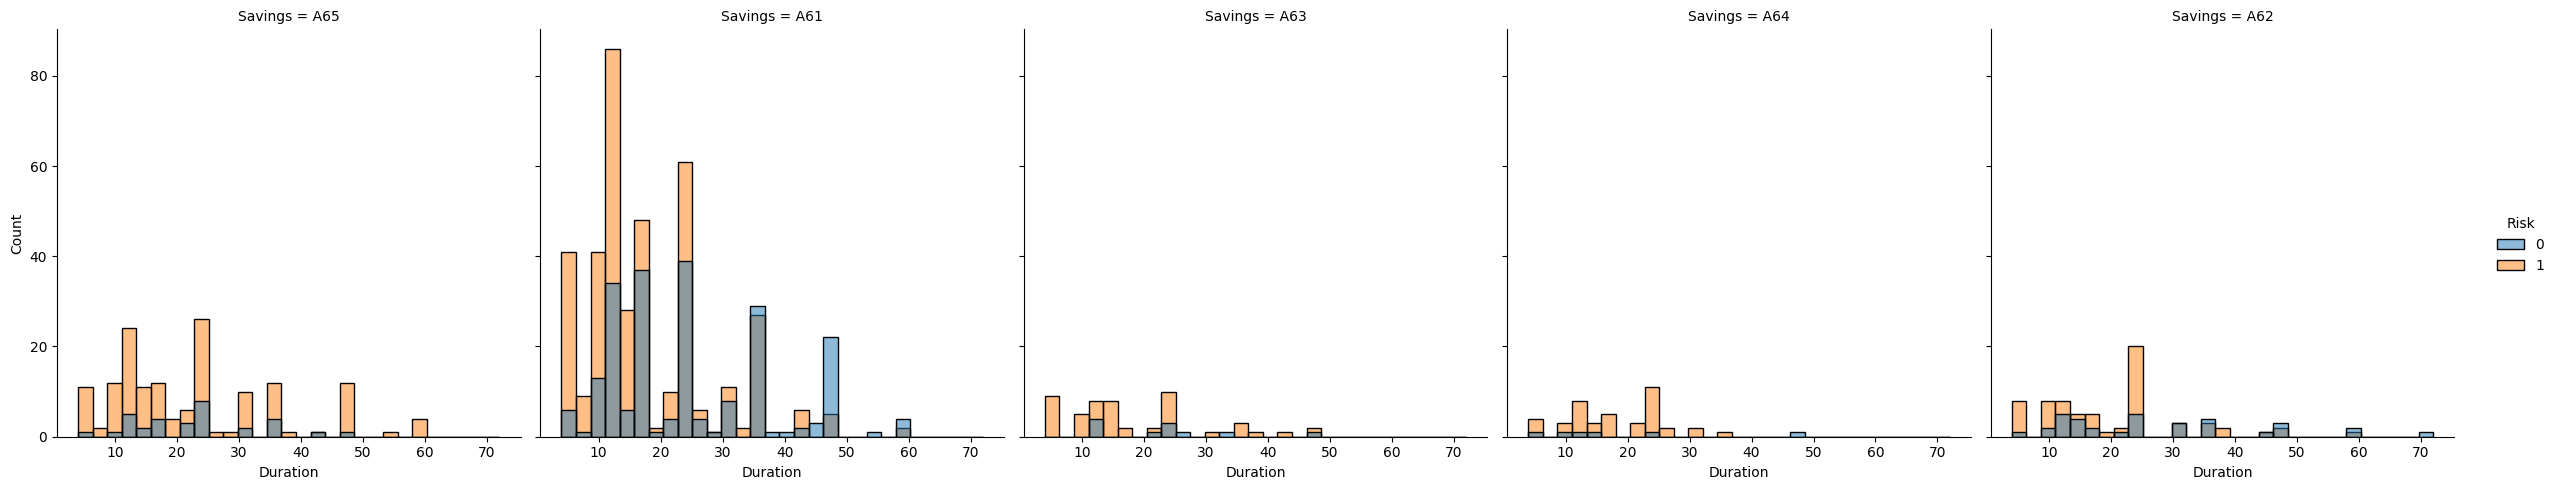

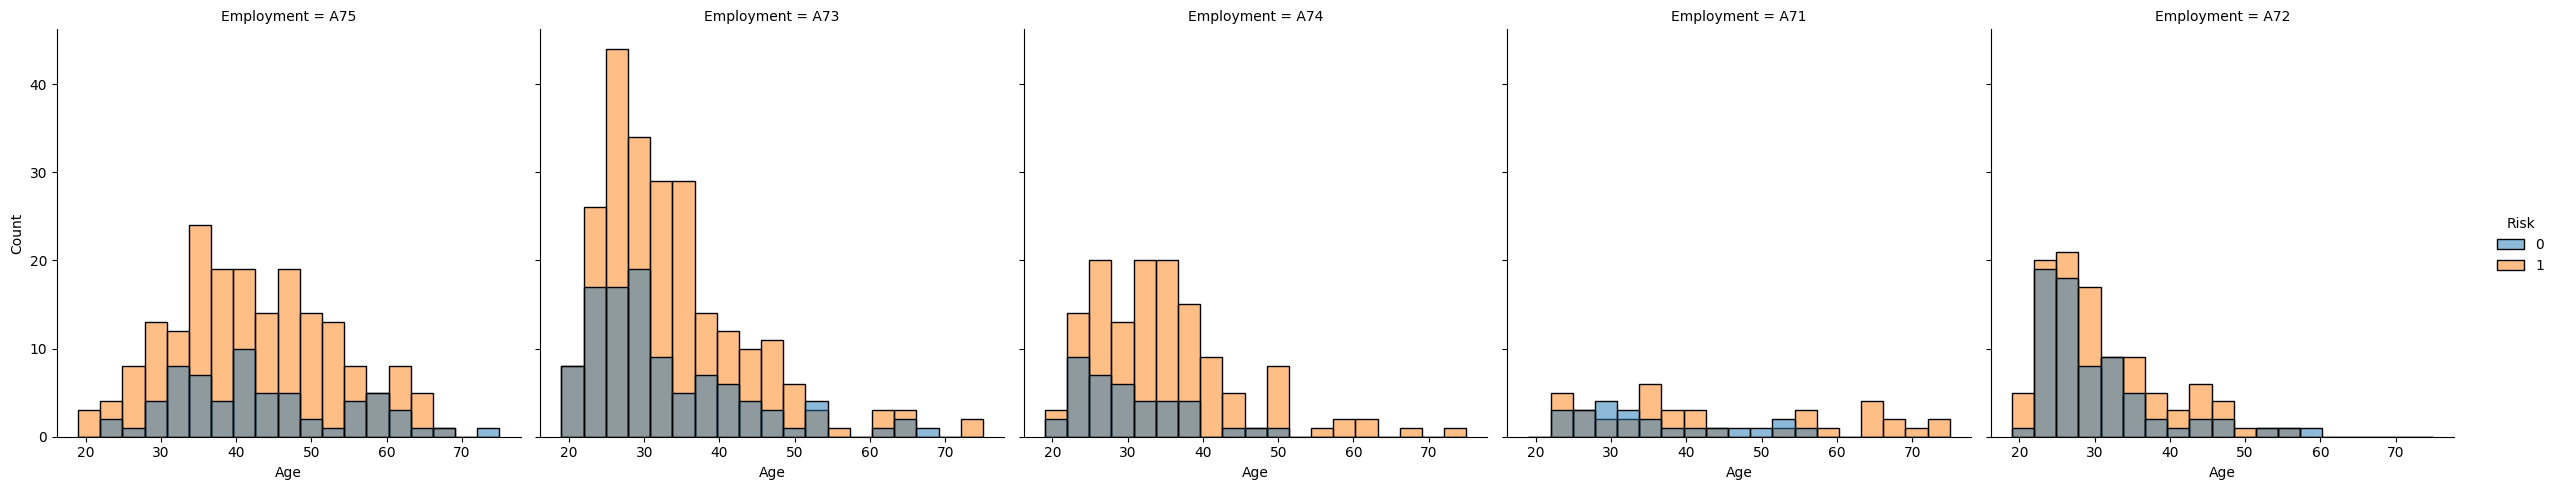

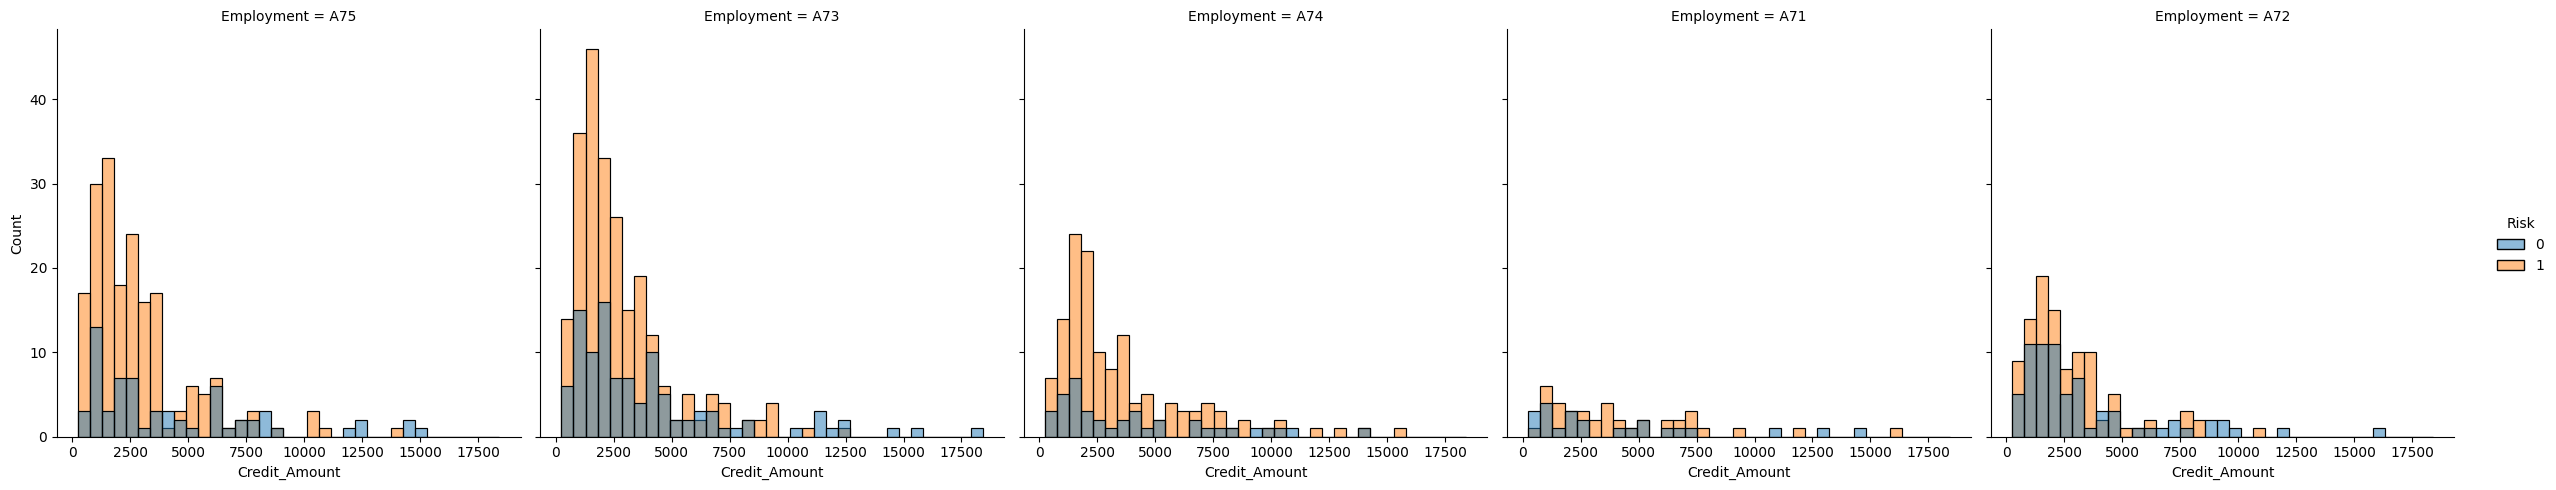

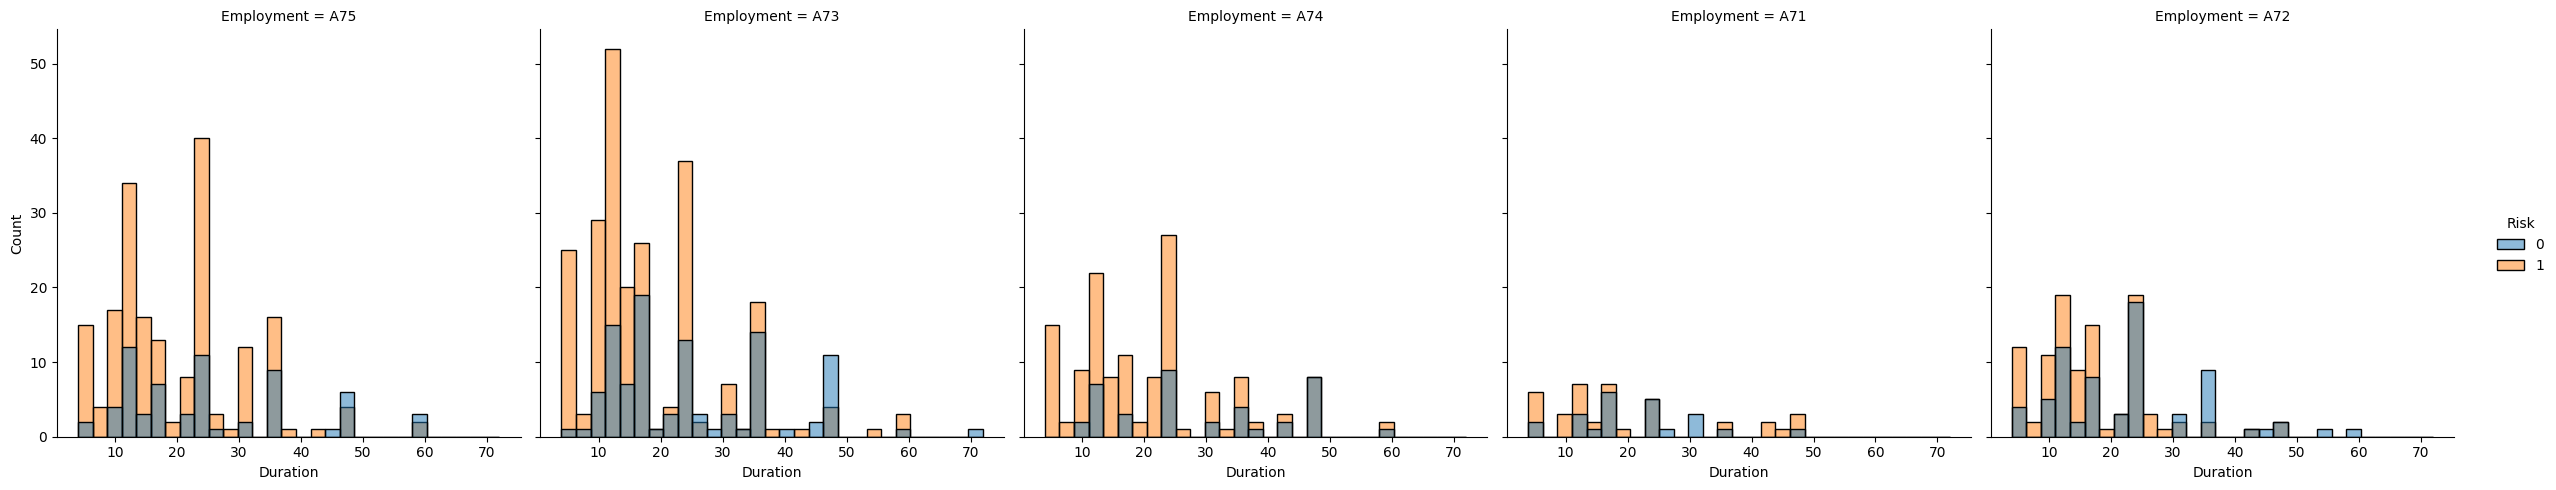

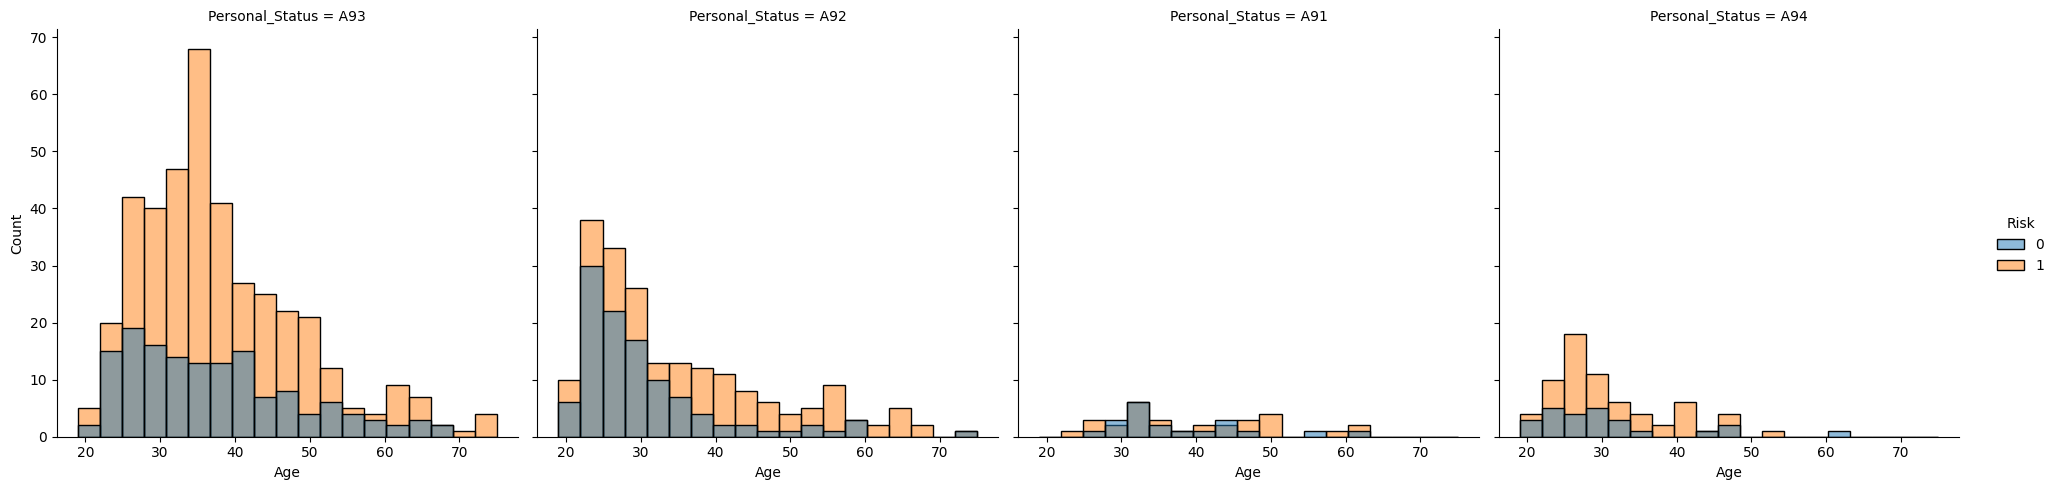

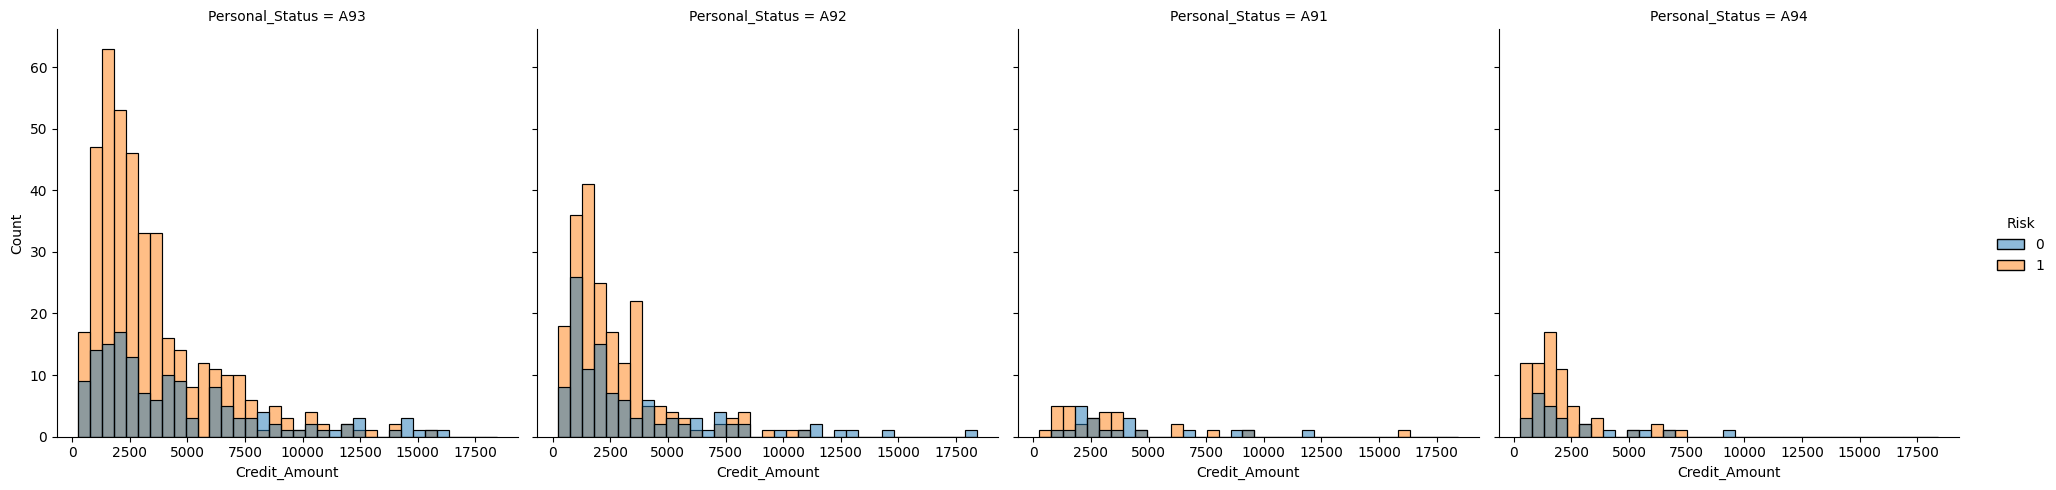

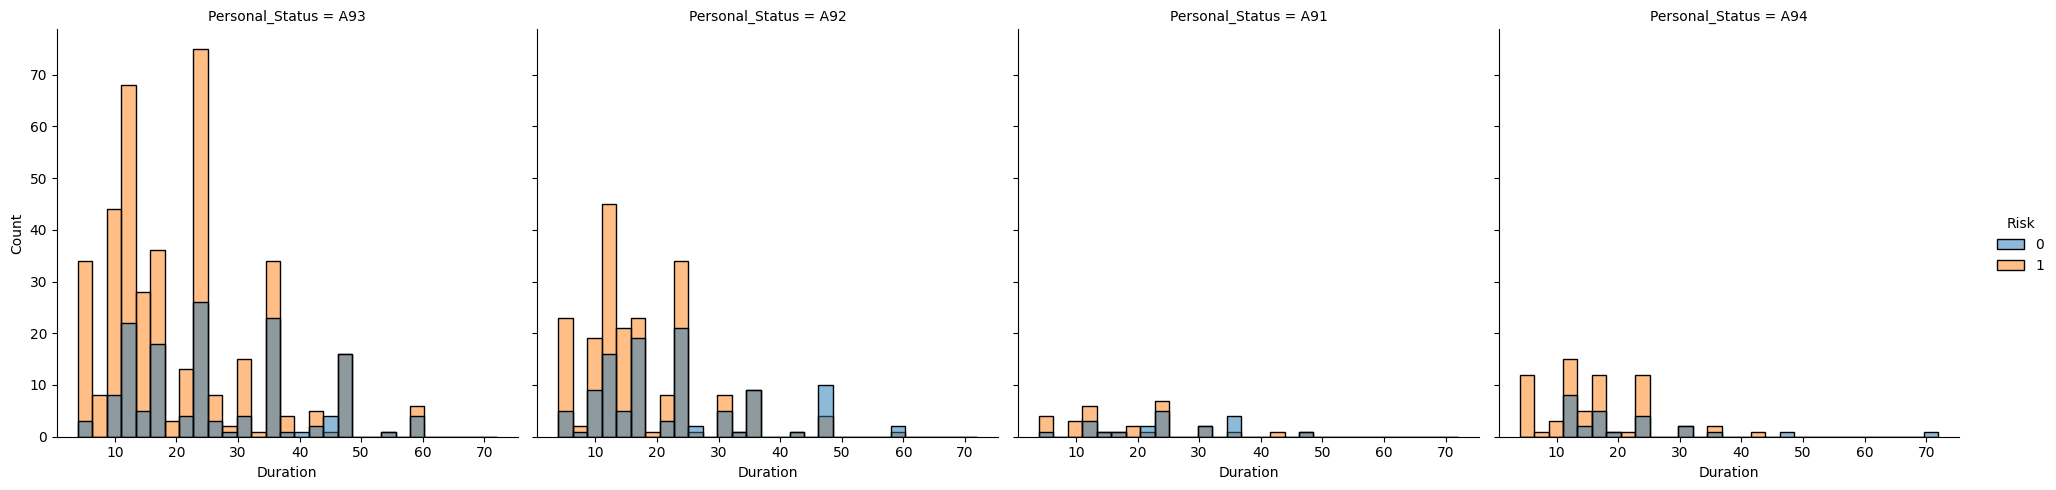

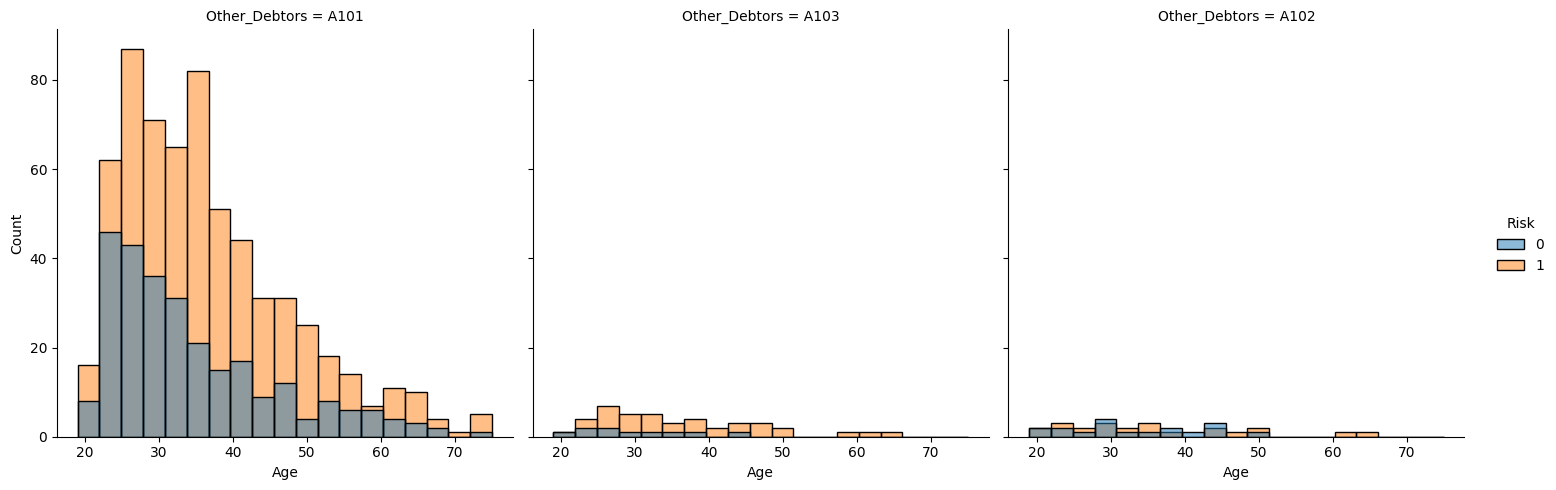

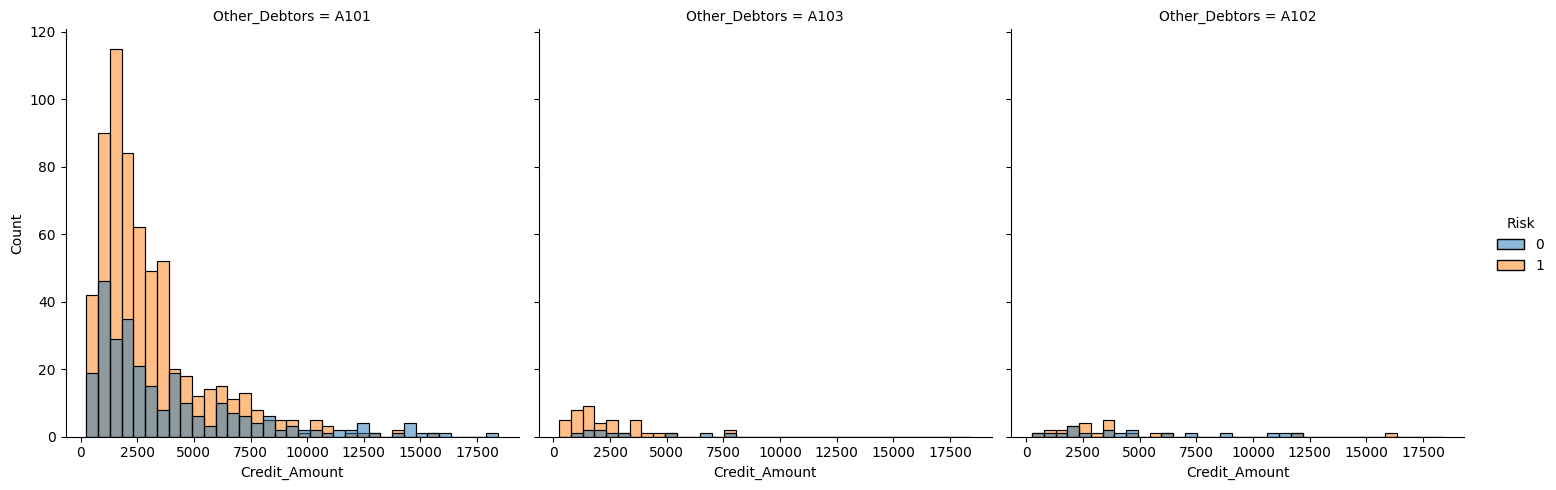

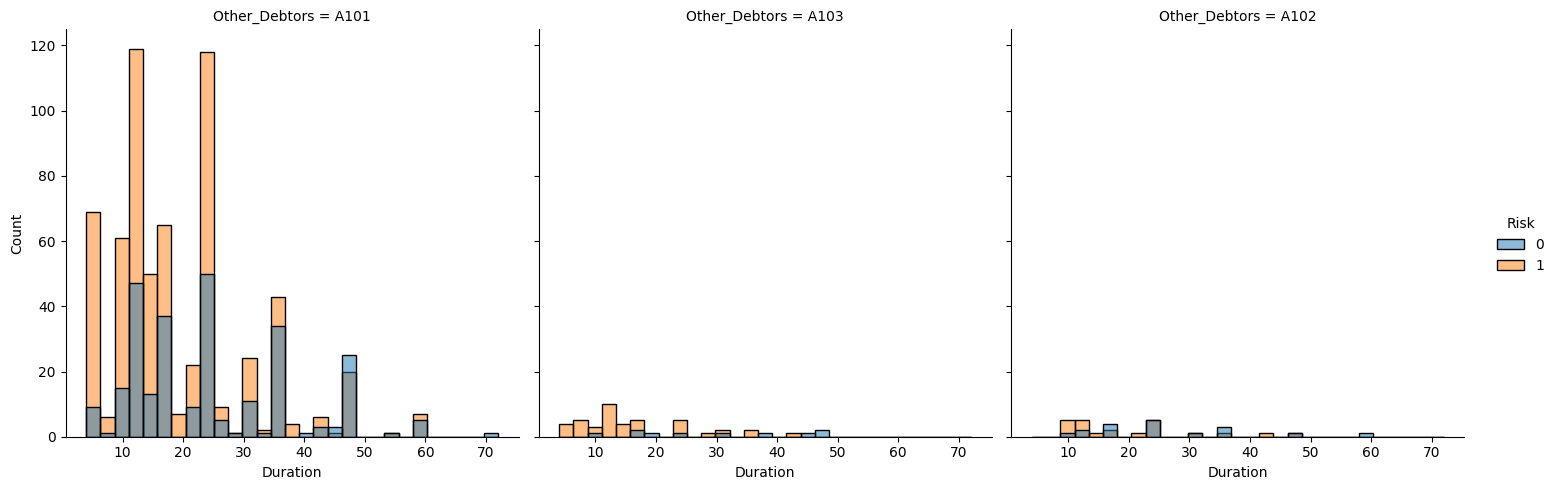

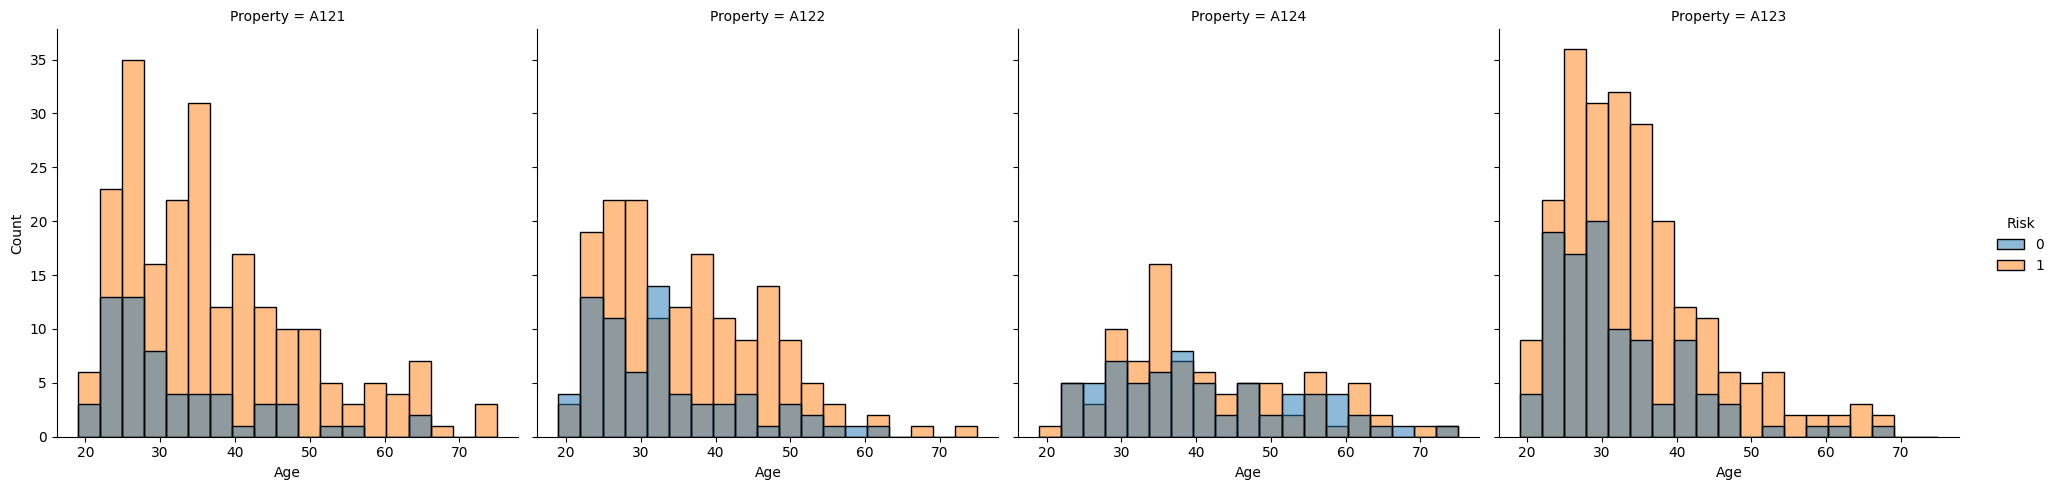

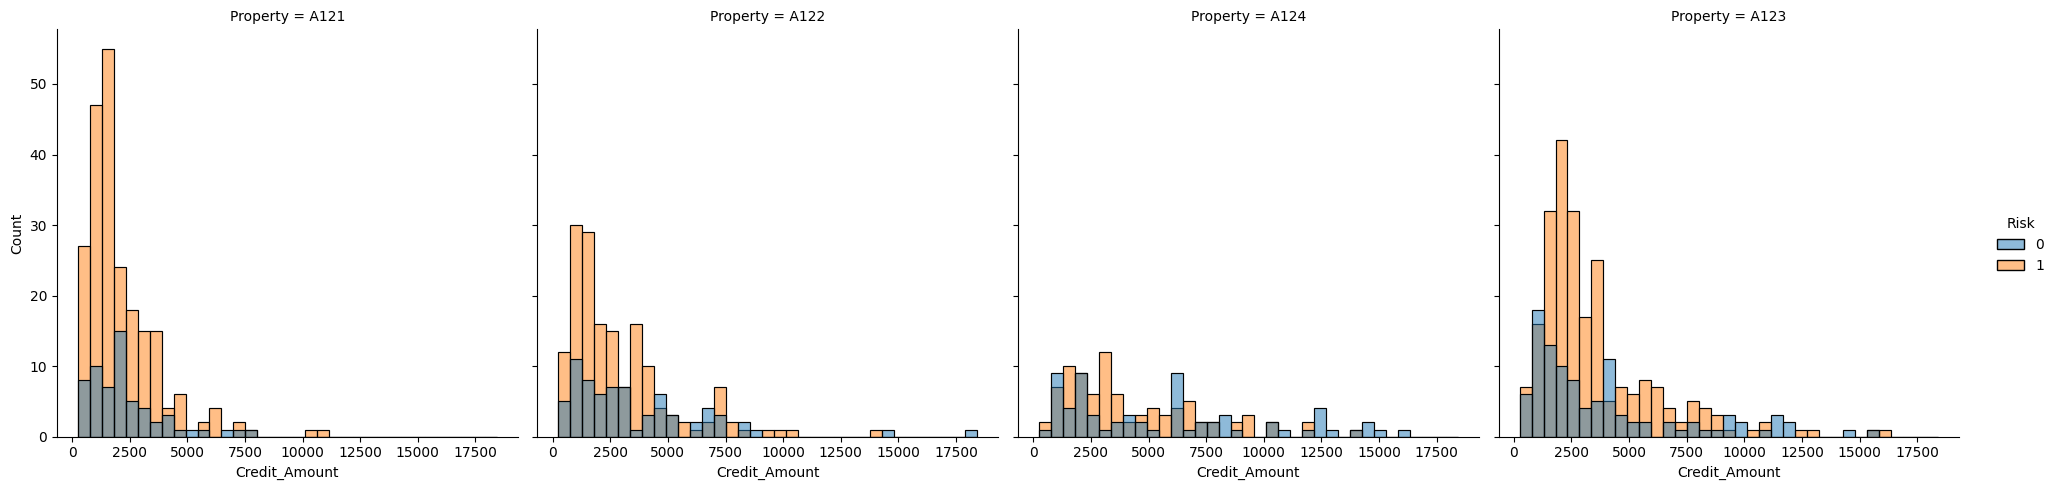

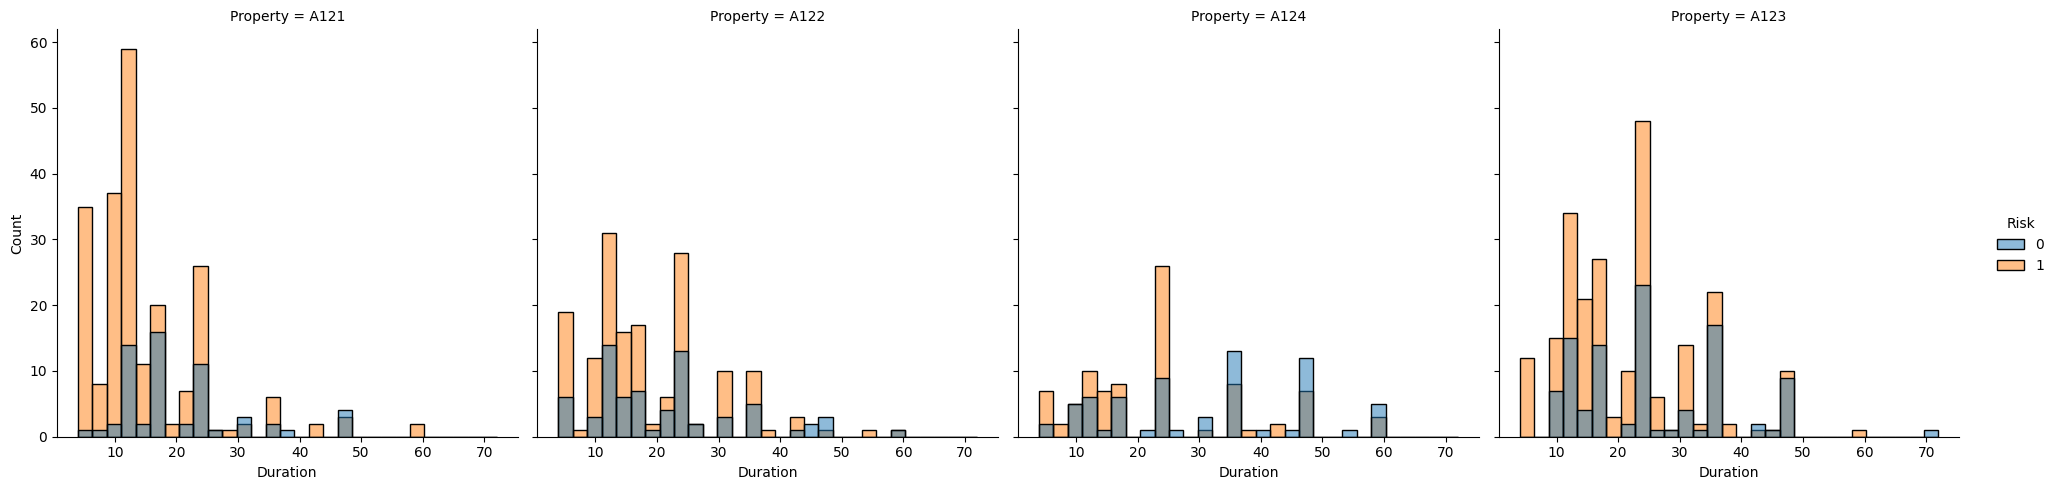

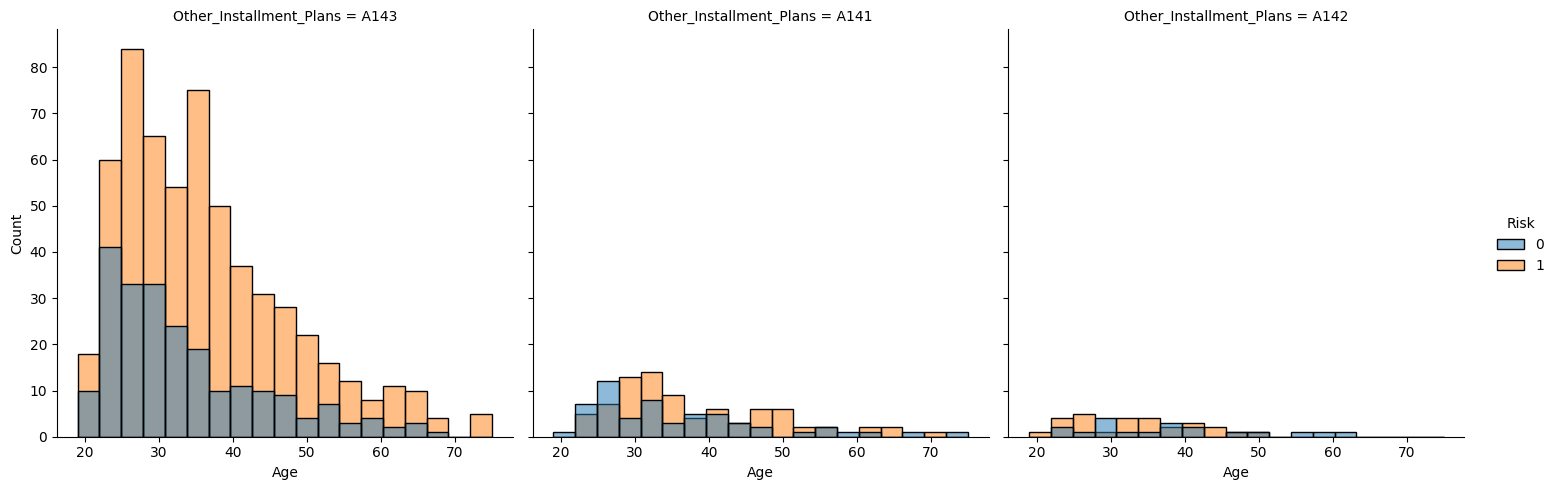

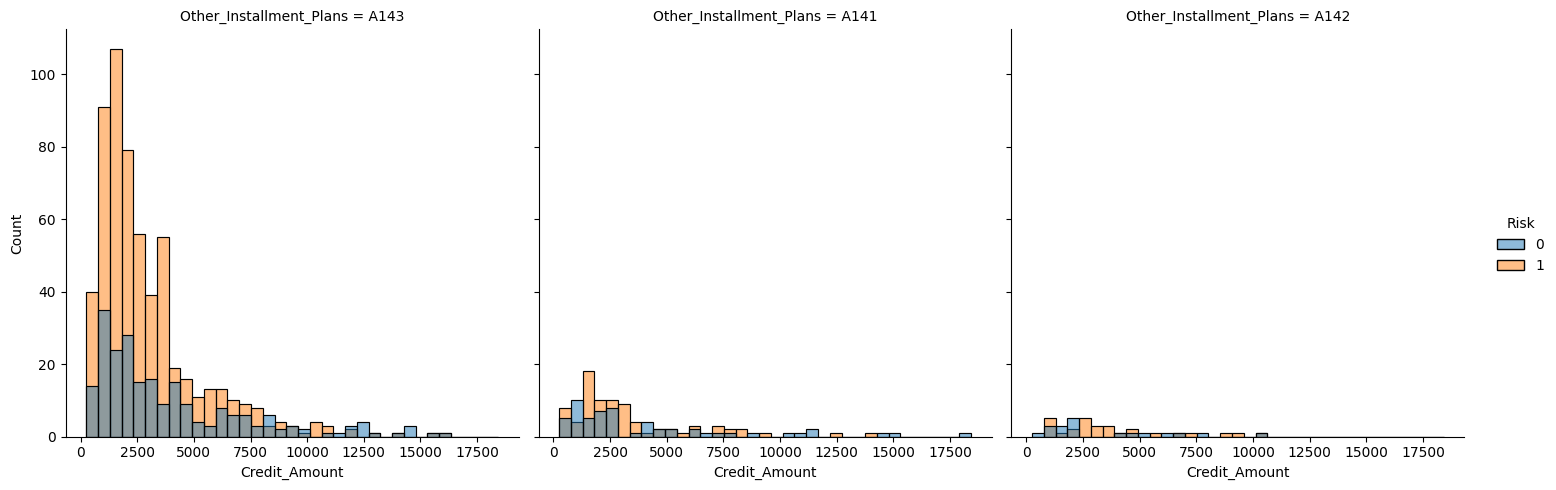

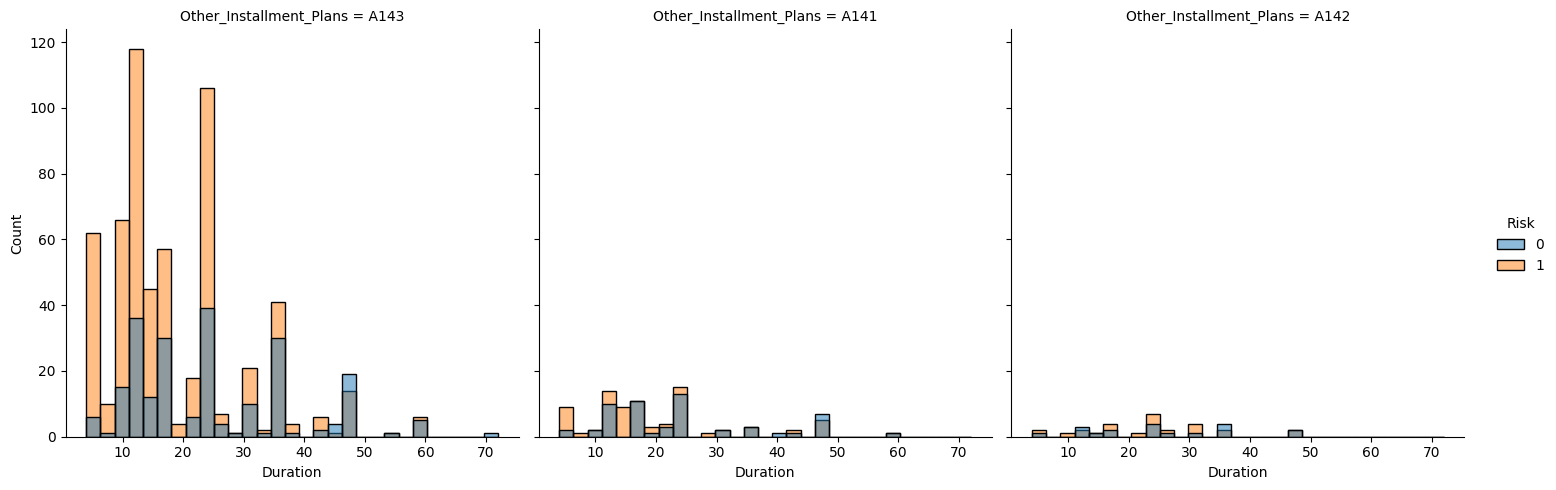

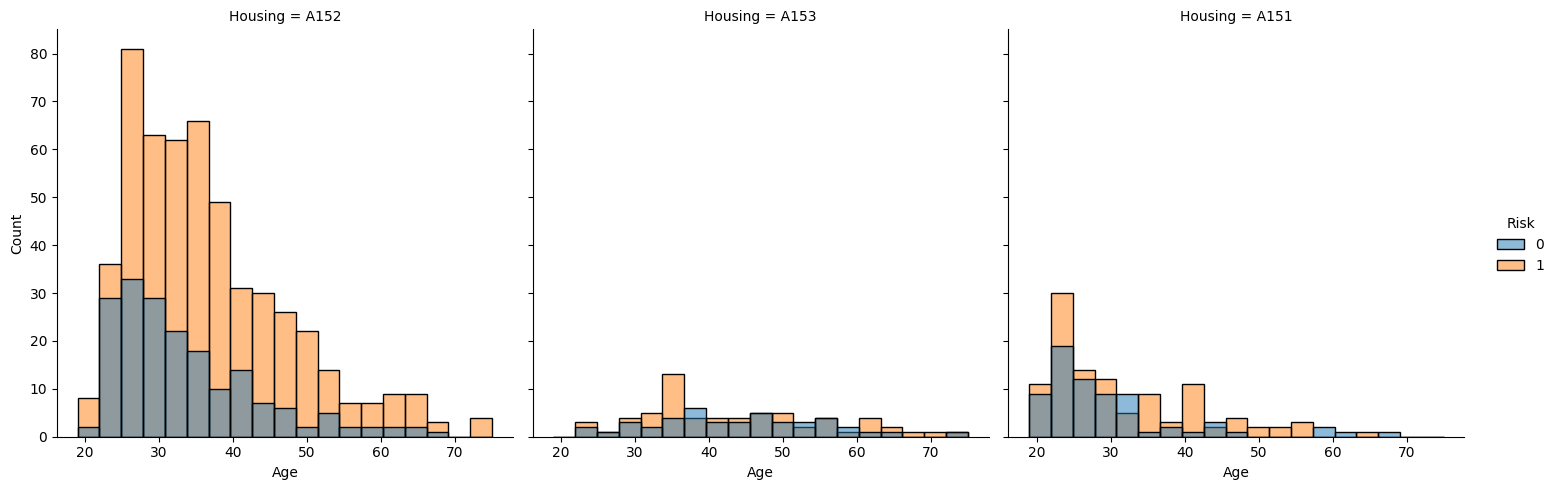

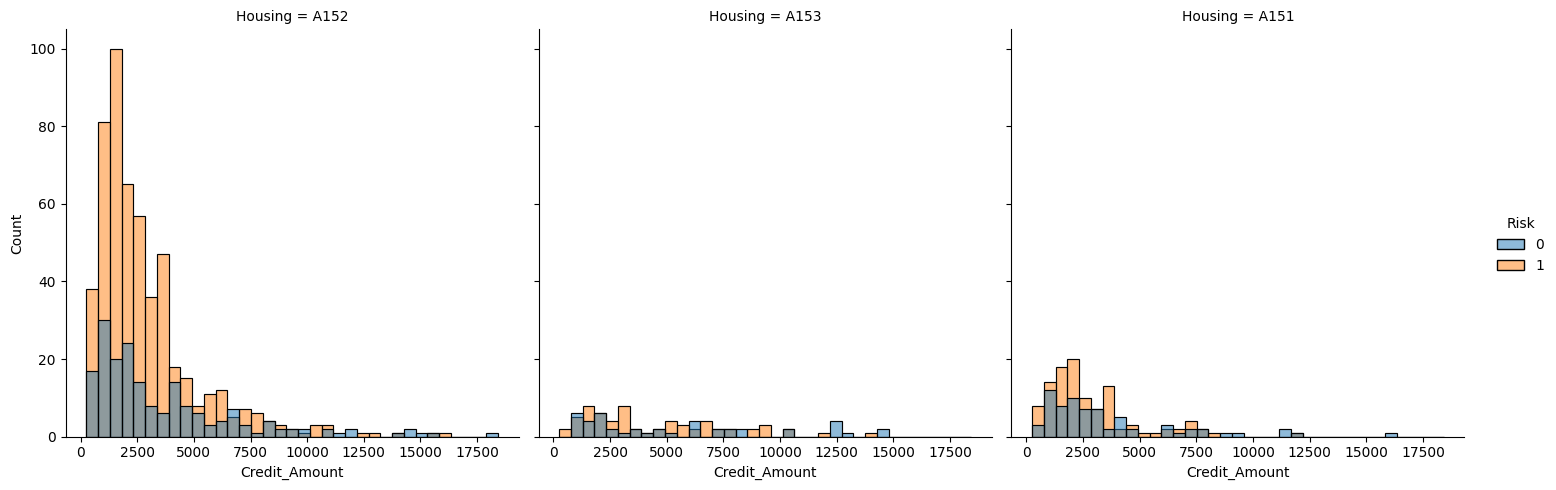

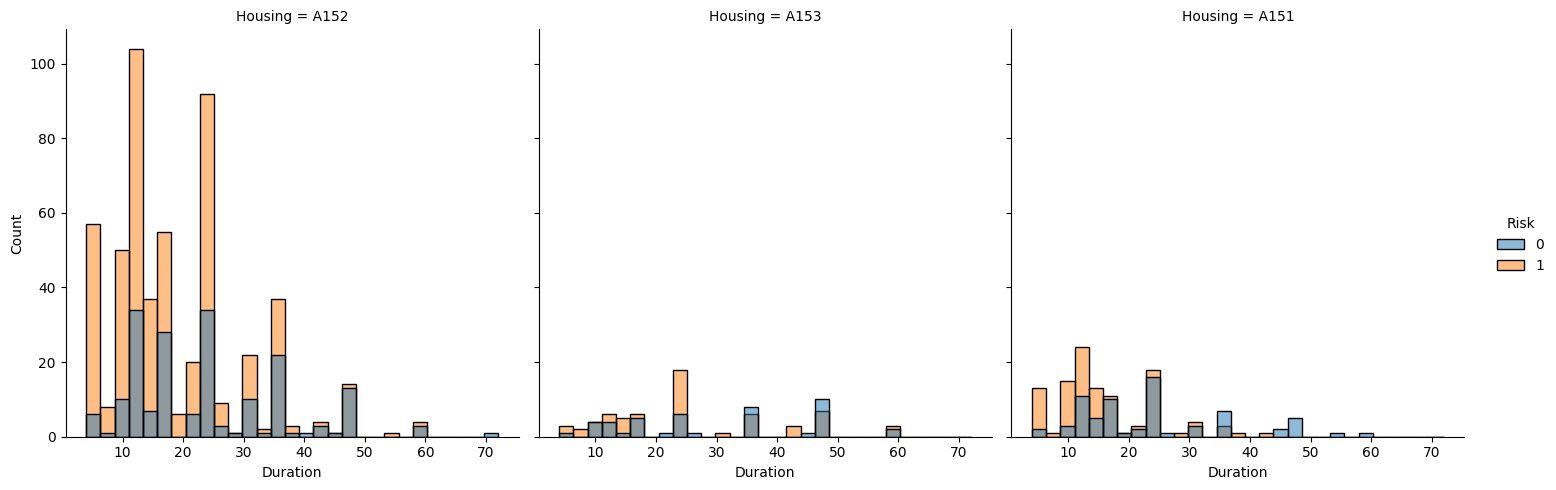

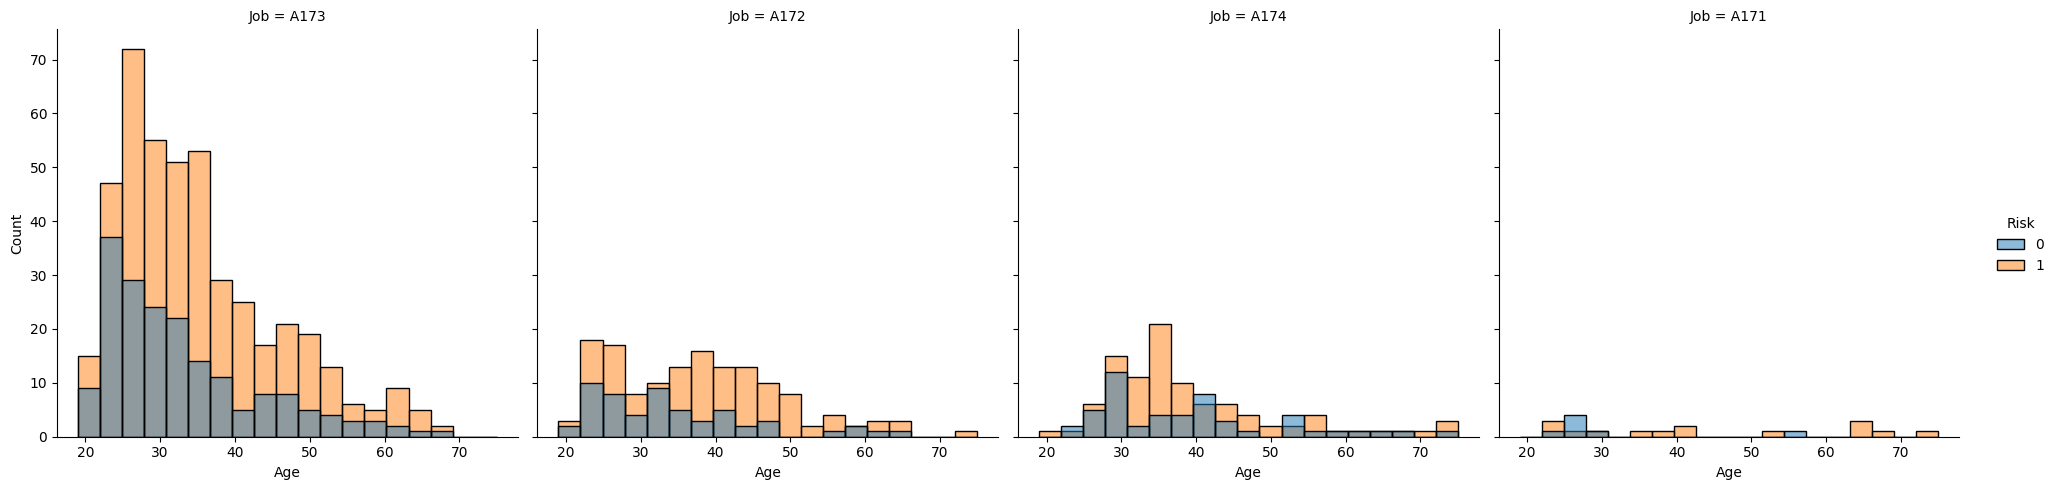

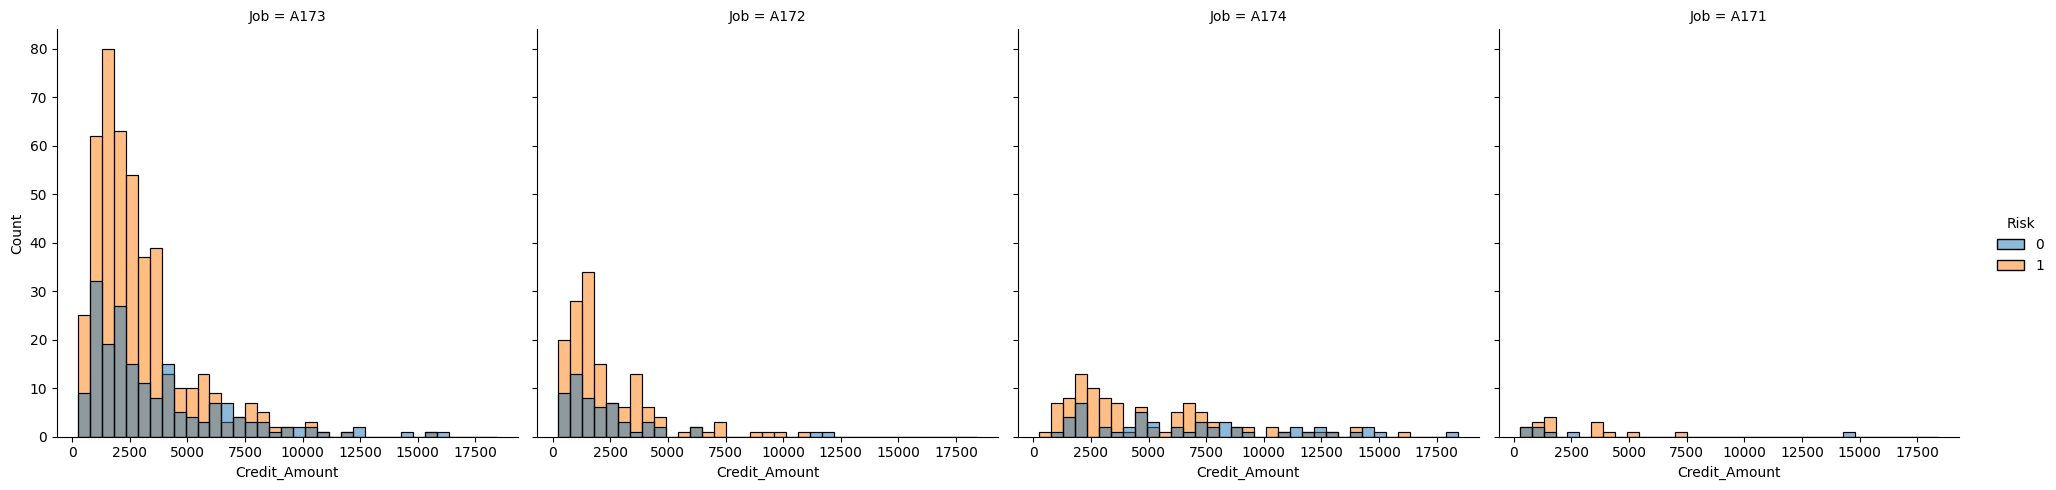

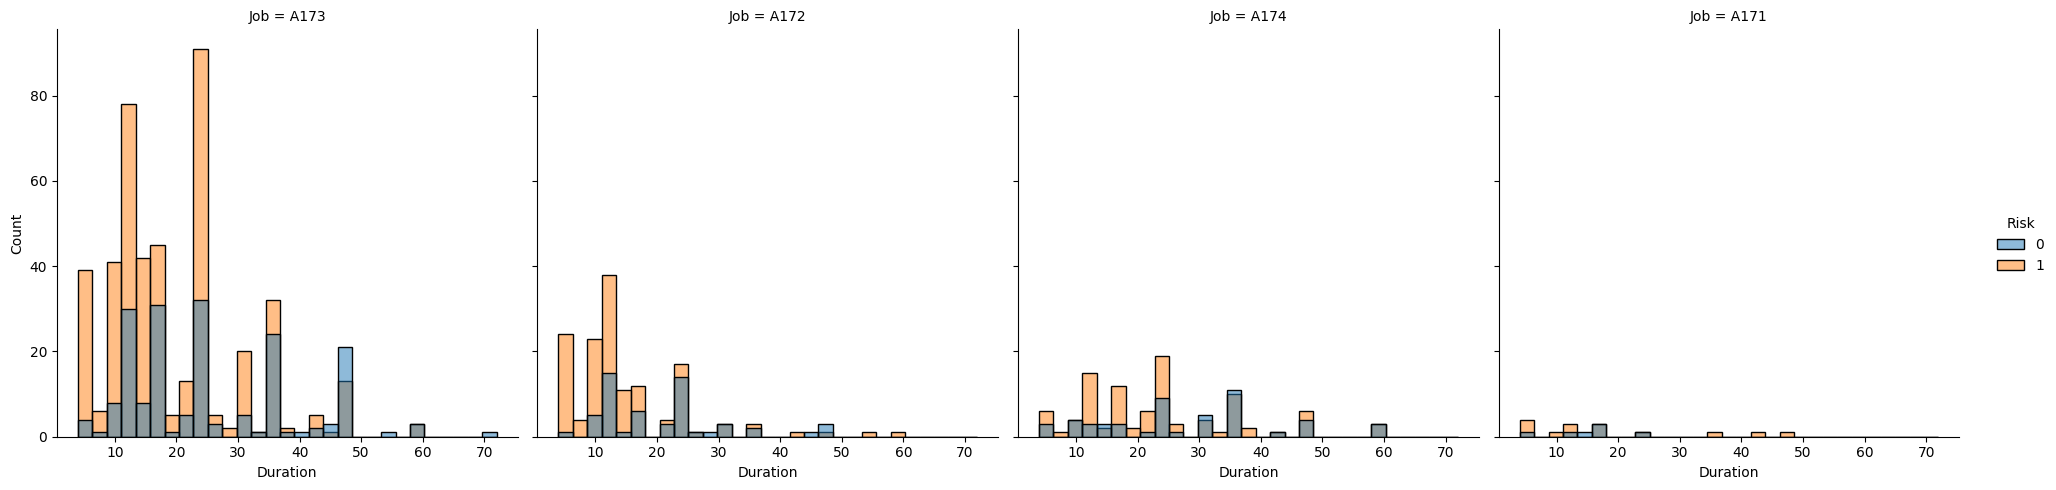

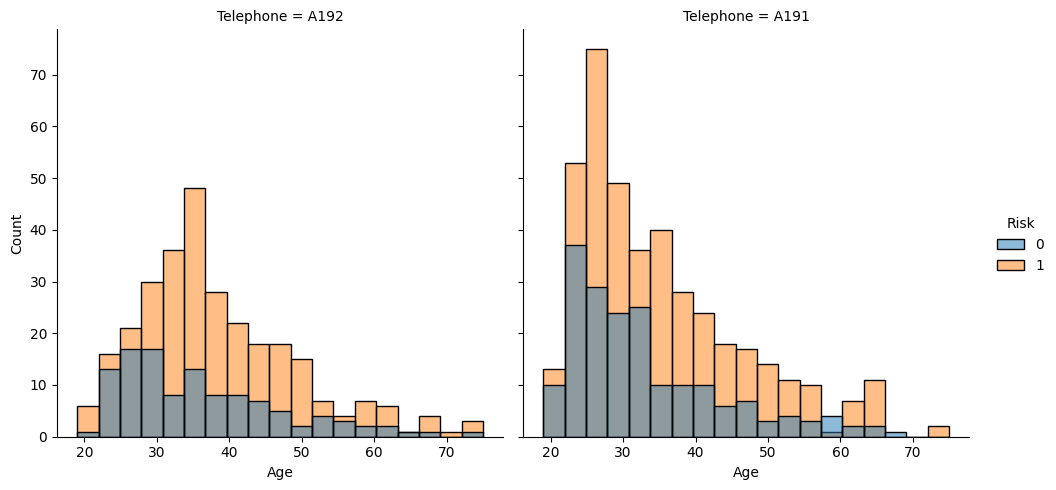

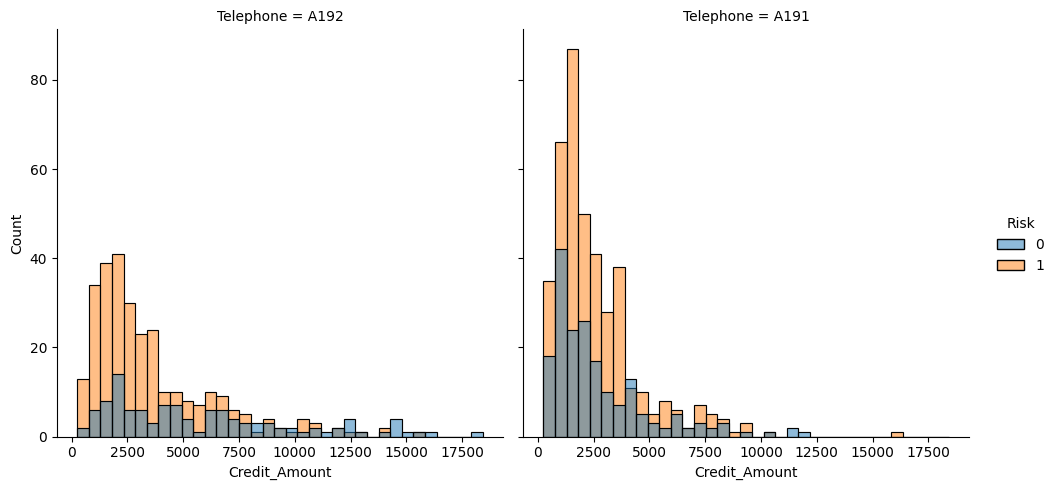

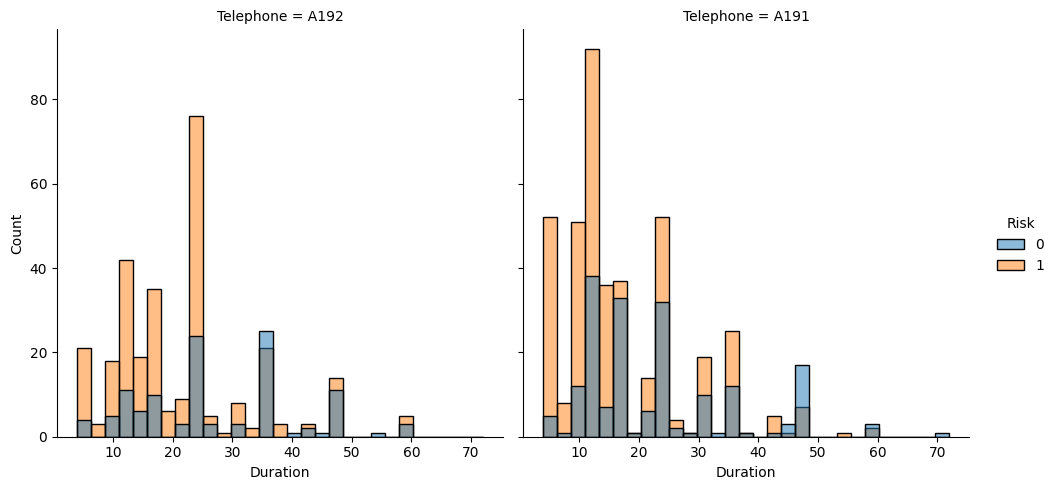

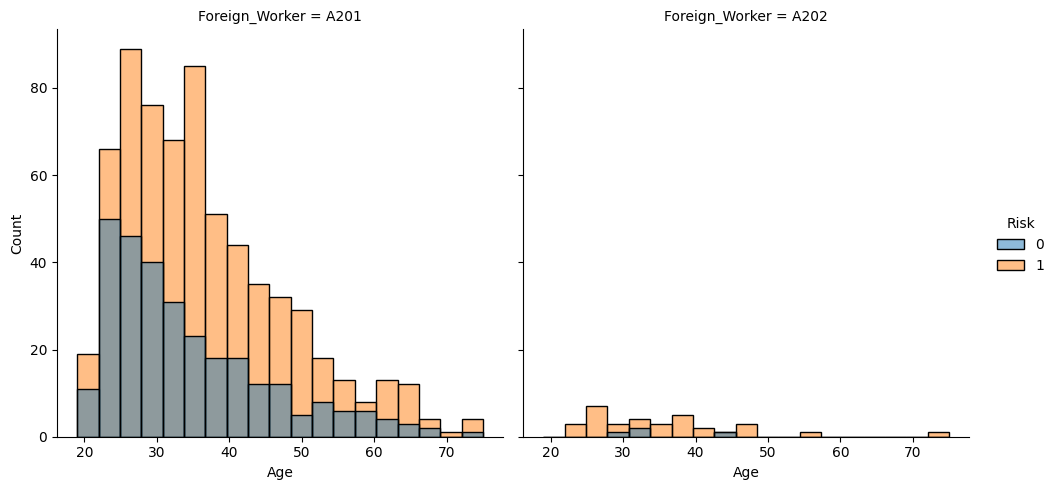

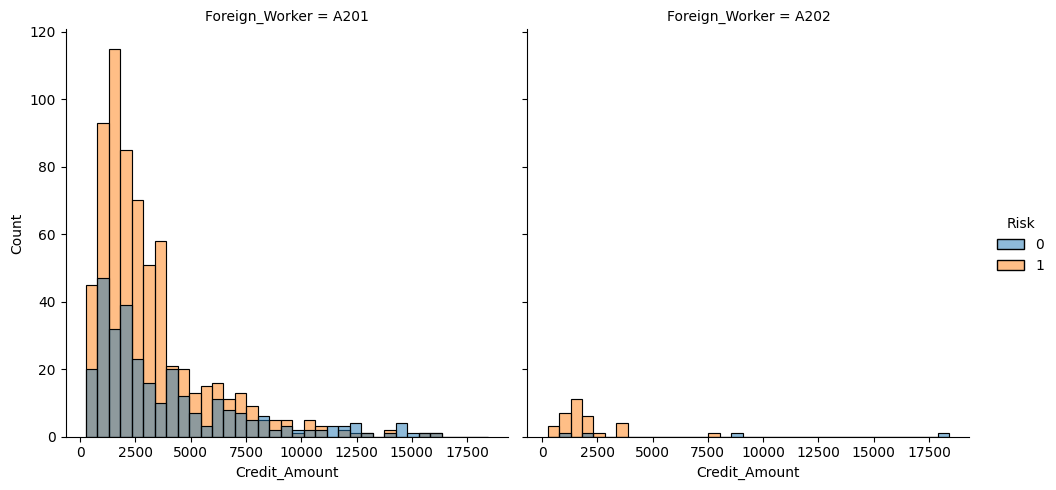

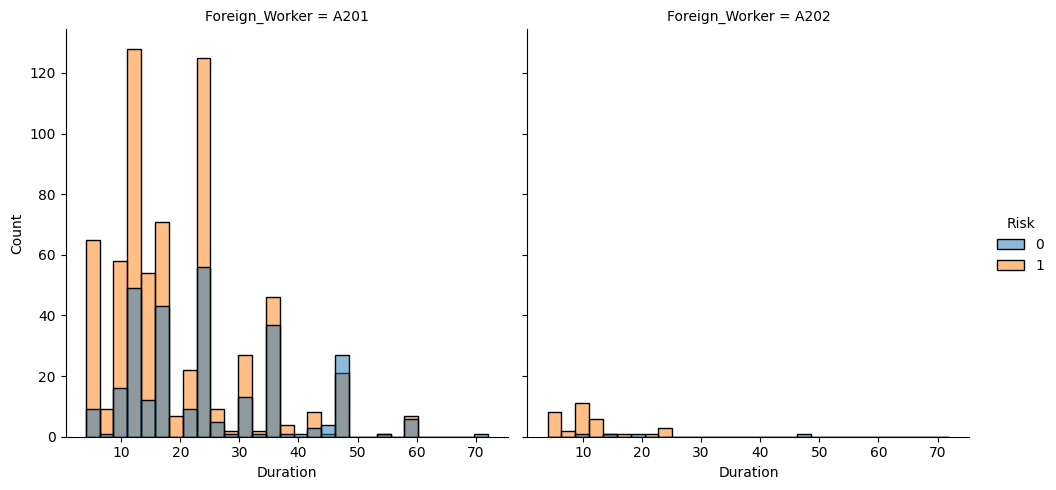

In [71]:
for col in categorical_columns:
    for row in rows:
        sns.displot(df, x = row, hue = "Risk", col = col)